# 데이터 불러오기

In [1]:
### 필요한 라이브러리 임폴트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from keras.optimizers import Adam
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
plt.rc('font', family='NanumBarunGothic')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/KDT/본 프로젝트'

Mounted at /content/drive
/content/drive/MyDrive/KDT/본 프로젝트


In [5]:
### pandas read_csv()함수를 이용, 데이터 셋 생성하기
df = pd.read_csv('0727_Seoul_preprocessed.csv', encoding = 'cp949', index_col=0)

# 결과 확인
print(df.head())
print('='*100)
print(df.tail())
print('='*100)
print(df.info())

   기준_년_코드  기준_분기_코드   자치구    행정동  대분류    상권_코드    중분류         업종명  총_점포수  \
0     2022         1  서대문구  북가좌2동  서비스  2110499     의료         한의원      1   
1     2022         1   노원구   공릉1동   소매  2110433  의류/잡화          안경      1   
2     2022         1   마포구   성산1동   소매  2110548   전자기기  컴퓨터및주변장치판매      4   
3     2022         1   은평구    대조동  서비스  2110481     미용       피부관리실      3   
4     2022         1  영등포구   신길6동  서비스  2110804     교육        예술학원      5   

   점포_수  ...  개업_점포_수  폐업_률  폐업_점포_수  프랜차이즈_점포_수   총_매출_금액  분기당_매출_금액  \
0     1  ...        0     0        0           0  54003138   54003138   
1     1  ...        0     0        0           0  16150022   16150022   
2     4  ...        0     0        0           0  89813767   89813767   
3     3  ...        1     0        0           0   4619842    4619842   
4     5  ...        0     0        0           0   5946480    5946480   

   주중_매출_금액  주말_매출_금액  남성_매출_금액  여성_매출_금액  
0  35504845  18498293   8791373  45211765  
1  1467465

In [6]:
# 이런저런 전처리

# 컬럼명 바꾸기
df = df.rename(columns = {'남성_매출_금액' : '남성매출금액',
                          '여성_매출_금액' : '여성매출금액',
                          '점포_수' : '점포수',
                          '총_점포수' : '총 점포수',
                          '개업_점포_수' : '개업점포수',
                          '폐업_점포_수' : '폐업점포수',
                          '프랜차이즈_점포_수' : '프랜차이즈 수',
                          '개업_율' : '개업률',
                          '폐업_률' : '폐업률'})

# df에 분기, 상반기/하반기 추가
df['분기'] = df['기준_년_코드'].astype(str) + '-' + df['기준_분기_코드'].astype(str)
df['반기'] = df['기준_분기_코드'].map({1:'상반기', 2:'상반기', 3:'하반기', 4:'하반기'})
df['반기'] = df['기준_년_코드'].astype(str) + ' ' + df['반기']

df.columns

Index(['기준_년_코드', '기준_분기_코드', '자치구', '행정동', '대분류', '상권_코드', '중분류', '업종명',
       '총 점포수', '점포수', '순점포증감률', '개업률', '개업점포수', '폐업률', '폐업점포수', '프랜차이즈 수',
       '총_매출_금액', '분기당_매출_금액', '주중_매출_금액', '주말_매출_금액', '남성매출금액', '여성매출금액',
       '분기', '반기'],
      dtype='object')

In [7]:
# 분기별 내림차순 정렬
df = df.sort_values(by=['기준_년_코드', '기준_분기_코드'], ascending=True).reset_index().drop('index', axis=1)
# df

In [8]:
# 압구정동만 남김
df_ap = df[df.행정동=='압구정동'].reset_index().drop('index', axis=1)

# df_ap

In [9]:
# 분기별 업종별 매출금액 합치기

df_ap_quarter = df_ap.groupby(['분기', '대분류', '중분류', '업종명', '행정동'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()

# 분식전문점

In [11]:
# 분식전문점만 남기기
ap_bunsik = df_ap_quarter[df_ap_quarter.업종명 == '분식전문점'].reset_index().drop('index', axis=1)
ap_bunsik

,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수
0,2017-1,외식,식사류,분식전문점,압구정동,3705934241,111,6,10
1,2017-2,외식,식사류,분식전문점,압구정동,3996708062,110,6,7
2,2017-3,외식,식사류,분식전문점,압구정동,4041582907,115,11,6
3,2017-4,외식,식사류,분식전문점,압구정동,3385458535,118,9,6
4,2018-1,외식,식사류,분식전문점,압구정동,3377296114,123,13,8
5,2018-2,외식,식사류,분식전문점,압구정동,3552330599,135,16,4
6,2018-3,외식,식사류,분식전문점,압구정동,3730843072,145,15,5
7,2018-4,외식,식사류,분식전문점,압구정동,5377797289,154,15,6
8,2019-1,외식,식사류,분식전문점,압구정동,4188805456,156,9,7
9,2019-2,외식,식사류,분식전문점,압구정동,4201566574,169,16,3


## 지표 만들기 : 성장성, 순점포증감률, 시장성

In [12]:
# 기초구역 단위별 선택 업종의 전분기 대비 당기의 매출 증감률을 비교하여 성장 정도를 판단
# 성장성 = 당기 매출액 / 전분기 매출액

# 성장성 추가
# shift() 사용. 참고 : https://seong6496.tistory.com/216

ap_bunsik['성장성'] = ap_bunsik['분기당_매출_금액'] / ap_bunsik['분기당_매출_금액'].shift(1)
# 성장성이 1 이하면 지난분기 대비 이번분기 매출이 줄어든 것. 1 이상이어야 해당 분기 매출 상승.


# # 17년도 1분기 성장성 값은 1로 임의로 정한다. 구할 수가 없어서...
ap_bunsik['성장성'][0] = 1

ap_bunsik

<ipython-input-12-4de302861208>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_bunsik['성장성'][0] = 1


,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수,성장성
0,2017-1,외식,식사류,분식전문점,압구정동,3705934241,111,6,10,1.000000
1,2017-2,외식,식사류,분식전문점,압구정동,3996708062,110,6,7,1.078462
2,2017-3,외식,식사류,분식전문점,압구정동,4041582907,115,11,6,1.011228
3,2017-4,외식,식사류,분식전문점,압구정동,3385458535,118,9,6,0.837657
4,2018-1,외식,식사류,분식전문점,압구정동,3377296114,123,13,8,0.997589
5,2018-2,외식,식사류,분식전문점,압구정동,3552330599,135,16,4,1.051827
6,2018-3,외식,식사류,분식전문점,압구정동,3730843072,145,15,5,1.050252
7,2018-4,외식,식사류,분식전문점,압구정동,5377797289,154,15,6,1.441443
8,2019-1,외식,식사류,분식전문점,압구정동,4188805456,156,9,7,0.778907
9,2019-2,외식,식사류,분식전문점,압구정동,4201566574,169,16,3,1.003046


In [13]:
# 개업률, 폐업률, 순점포증감률 추가

ap_bunsik['개업률'] = (ap_bunsik['개업점포수'] / ap_bunsik['총 점포수']) * 100
ap_bunsik['폐업률'] = (ap_bunsik['폐업점포수'] / ap_bunsik['총 점포수']) * 100
ap_bunsik['순점포증감률'] = ((ap_bunsik['개업점포수'] - ap_bunsik['폐업점포수']) / ap_bunsik['총 점포수']) * 100

ap_bunsik

,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수,성장성,개업률,폐업률,순점포증감률
0,2017-1,외식,식사류,분식전문점,압구정동,3705934241,111,6,10,1.000000,5.405405,9.009009,-3.603604
1,2017-2,외식,식사류,분식전문점,압구정동,3996708062,110,6,7,1.078462,5.454545,6.363636,-0.909091
2,2017-3,외식,식사류,분식전문점,압구정동,4041582907,115,11,6,1.011228,9.565217,5.217391,4.347826
3,2017-4,외식,식사류,분식전문점,압구정동,3385458535,118,9,6,0.837657,7.627119,5.084746,2.542373
4,2018-1,외식,식사류,분식전문점,압구정동,3377296114,123,13,8,0.997589,10.569106,6.504065,4.065041
5,2018-2,외식,식사류,분식전문점,압구정동,3552330599,135,16,4,1.051827,11.851852,2.962963,8.888889
6,2018-3,외식,식사류,분식전문점,압구정동,3730843072,145,15,5,1.050252,10.344828,3.448276,6.896552
7,2018-4,외식,식사류,분식전문점,압구정동,5377797289,154,15,6,1.441443,9.740260,3.896104,5.844156
8,2019-1,외식,식사류,분식전문점,압구정동,4188805456,156,9,7,0.778907,5.769231,4.487179,1.282051
9,2019-2,외식,식사류,분식전문점,압구정동,4201566574,169,16,3,1.003046,9.467456,1.775148,7.692308


In [14]:
# 시장성 추가
# 기초구역 단위별 점포당 평균 매출을 시군구의 평균 매출과 비교하여 시군구 평균 대비 시장성을 판단
# 시장성 = (행정동 내 분기 매출액 / 분기 점포수) - (자치구 내 분기 매출액 / 분기 점포수)



################################################################################################################################################################################################

# 자치구 평균 매출을 구하기 위해, 원본 데이터로 잠깐 작업하겠습니다
df_gangnam = df[df['자치구'] == '강남구']

# 자치구 분기별 업종별 매출금액 합치기
df_gangnam_quarter = df_gangnam.groupby(['분기', '자치구', '대분류', '중분류', '업종명'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()

# 분식전문점만 남기기
gangnam_bunsik = df_gangnam_quarter[df_gangnam_quarter['업종명'] == '분식전문점'].reset_index()

################################################################################################################################################################################################

ap_bunsik['시장성'] = (ap_bunsik['분기당_매출_금액'] / ap_bunsik['총 점포수']) - (gangnam_bunsik['분기당_매출_금액'] / gangnam_bunsik['총 점포수'])

ap_bunsik = ap_bunsik[['분기', '업종명','분기당_매출_금액', '성장성', '순점포증감률', '시장성']]
ap_bunsik

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,분식전문점,3705934241,1.000000,-3.603604,-3.283761e+07
1,2017-2,분식전문점,3996708062,1.078462,-0.909091,-2.974064e+07
2,2017-3,분식전문점,4041582907,1.011228,4.347826,-3.387565e+07
3,2017-4,분식전문점,3385458535,0.837657,2.542373,-3.514713e+07
4,2018-1,분식전문점,3377296114,0.997589,4.065041,-3.443415e+07
5,2018-2,분식전문점,3552330599,1.051827,8.888889,-3.460896e+07
6,2018-3,분식전문점,3730843072,1.050252,6.896552,-3.421668e+07
7,2018-4,분식전문점,5377797289,1.441443,5.844156,-3.140496e+07
8,2019-1,분식전문점,4188805456,0.778907,1.282051,-3.117048e+07
9,2019-2,분식전문점,4201566574,1.003046,7.692308,-2.346546e+07


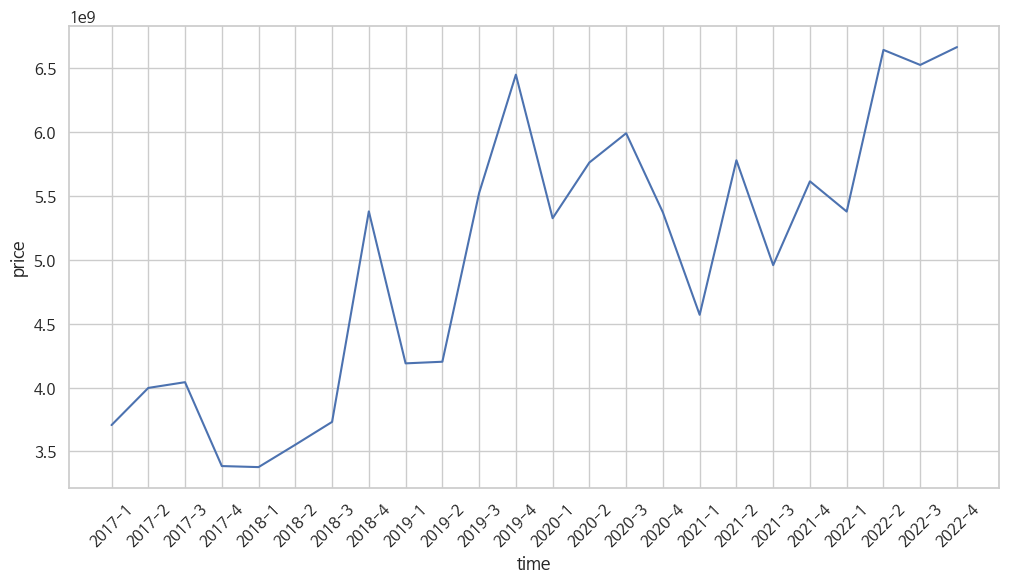

In [15]:
### seaborn lineplot을 이용, 전체 매출 시각화

# 시각화에 필요한 matplotlib.pyplot, seaborn 라이브러리 임폴트
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화
sns.set(style="whitegrid", color_codes=True, font='NanumBarunGothic')

plt.figure(figsize=(12, 6))
sns.lineplot(x=ap_bunsik['분기'], y=ap_bunsik['분기당_매출_금액'])
plt.xlabel('time')
plt.xticks(rotation=45)
plt.ylabel('price')
plt.show()

## 23년 1분기 매출 예측

In [16]:
# 총 매출액을 예측하기 위한 지표로는 성장성, 안정성, 시장성, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_bunsik[['성장성', '시장성', '순점포증감률']]
y = ap_bunsik.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -3.283761e+07 -3.603604
1   1.078462 -2.974064e+07 -0.909091
2   1.011228 -3.387565e+07  4.347826
3   0.837657 -3.514713e+07  2.542373
4   0.997589 -3.443415e+07  4.065041
5   1.051827 -3.460896e+07  8.888889
6   1.050252 -3.421668e+07  6.896552
7   1.441443 -3.140496e+07  5.844156
8   0.778907 -3.117048e+07  1.282051
9   1.003046 -2.346546e+07  7.692308
10  1.314055 -3.001125e+07  1.142857
11  1.167748 -1.578800e+07  2.840909
12  0.825829 -1.483297e+07  6.172840
13  1.081854 -9.968984e+06  4.046243
14  1.039710 -9.288583e+06  3.888889
15  0.896576 -1.117391e+07  5.759162
16  0.850879 -1.292837e+07  3.030303
17  1.264565 -1.187691e+07 -1.538462
18  0.857984 -1.044694e+07 -0.515464
19  1.132285 -1.426054e+07  5.365854
20  0.957864 -1.591227e+07  3.301887
21  1.235220 -2.567918e+07  5.454545
22  0.982282 -2.929913e+07  2.212389
23  1.021391 -2.864857e+07 -1.793722
---------------------------------------------------------------------------

In [17]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [18]:
### 시계열 분석에 적합한 데이터를 만들어 주는 함수 정의
def make_dataset(X, y, window_size=10):
    X_data = []
    y_data = []
    for start in np.arange(len(X) - window_size):
        stop = start + window_size
        X_data.append(X[start:stop, :])
        y_data.append(y[stop])
    return np.array(X_data), np.array(y_data)




### 시계열 분석에서 마지막 테스트 데이터를 만들어 주는 함수 정의
def make_last_dataset(X, window_size=10):
    X_data_last = []
    for start in np.arange(len(X) - window_size +1):
        stop = start + window_size
        X_data_last.append(X[start:stop, :])
    return X_data_last[-1]

In [19]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [20]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.30696477 0.22615347 0.46555905]
 [0.36599358 0.25131187 0.14487754]]


In [21]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [22]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
# model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 64)             17408     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [23]:
### 모델 학습

# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1960
Epoch 1: val_loss improved from inf to 0.45591, saving model to stock_model.h5
1/1 [==============================] - 8s 8s/step - loss: 0.1960 - val_loss: 0.4559
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1953
Epoch 2: val_loss improved from 0.45591 to 0.45425, saving model to stock_model.h5
1/1 [==============================] - 0s 86ms/step - loss: 0.1953 - val_loss: 0.4543
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1945
Epoch 3: val_loss improved from 0.45425 to 0.45260, saving model to stock_model.h5
1/1 [==============================] - 0s 90ms/step - loss: 0.1945 - val_loss: 0.4526
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1938
Epoch 4: val_loss improved from 0.45260 to 0.45095, saving model to stock_model.h5
1/1 [==============================] - 0s 86ms/step - loss: 0.1938 - val_loss: 0.4510
Epoch 5/300
1/1 [=================

In [24]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 642ms/step
[[0.33925727]
 [0.4152004 ]
 [0.3809023 ]
 [0.36799285]]


In [25]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_bunsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.608430,0.339257
2022-2,0.993341,0.415200
2022-3,0.957528,0.380902
2022-4,1.000000,0.367993


In [26]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_bunsik.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_bunsik의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.608430,0.339257,5376256926,4.491907e+09,8.843504e+08
2022-2,0.993341,0.415200,6640861464,4.741413e+09,1.899448e+09
2022-3,0.957528,0.380902,6523201170,4.628729e+09,1.894472e+09
2022-4,1.000000,0.367993,6662739416,4.586316e+09,2.076424e+09


In [27]:
df_test = df_test.reset_index()

### 결과

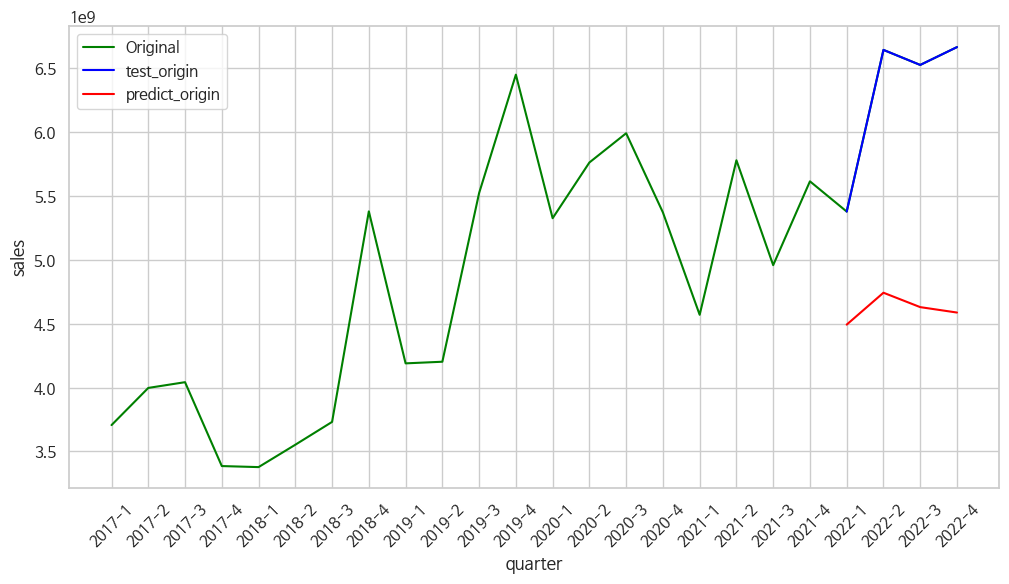

In [28]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_bunsik['분기'], ap_bunsik['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [29]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     1.688673e+09
std      5.428520e+08
min      8.843504e+08
25%      1.641941e+09
50%      1.896960e+09
75%      1.943692e+09
max      2.076424e+09
dtype: float64

In [30]:
### 23년 1분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 21ms/step
[[0.26452258]]
--------------------------------------------------------------------------------
예측된 매출  : 4246370048.0 


## 23년 1분기 성장성 예측

In [31]:
# 성장을 예측하기 위한 지표로는 성장성, 안정성, 시장성, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_bunsik[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_bunsik.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

     분기당_매출_금액           시장성    순점포증감률
0   3705934241 -3.283761e+07 -3.603604
1   3996708062 -2.974064e+07 -0.909091
2   4041582907 -3.387565e+07  4.347826
3   3385458535 -3.514713e+07  2.542373
4   3377296114 -3.443415e+07  4.065041
5   3552330599 -3.460896e+07  8.888889
6   3730843072 -3.421668e+07  6.896552
7   5377797289 -3.140496e+07  5.844156
8   4188805456 -3.117048e+07  1.282051
9   4201566574 -2.346546e+07  7.692308
10  5521087779 -3.001125e+07  1.142857
11  6447238178 -1.578800e+07  2.840909
12  5324318859 -1.483297e+07  6.172840
13  5760135655 -9.968984e+06  4.046243
14  5988868867 -9.288583e+06  3.888889
15  5369478015 -1.117391e+07  5.759162
16  4568778651 -1.292837e+07  3.030303
17  5777519847 -1.187691e+07 -1.538462
18  4957017842 -1.044694e+07 -0.515464
19  5612756253 -1.426054e+07  5.365854
20  5376256926 -1.591227e+07  3.301887
21  6640861464 -2.567918e+07  5.454545
22  6523201170 -2.929913e+07  2.212389
23  6662739416 -2.864857e+07 -1.793722
-------------------------

In [32]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [33]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [34]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.95752834 0.22615347 0.46555905]
 [1.         0.25131187 0.14487754]]


In [35]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [36]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [37]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2804
Epoch 1: val_loss improved from inf to 0.18544, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2804 - val_loss: 0.1854
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2795
Epoch 2: val_loss improved from 0.18544 to 0.18451, saving model to stock_model.h5
1/1 [==============================] - 0s 111ms/step - loss: 0.2795 - val_loss: 0.1845
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2785
Epoch 3: val_loss improved from 0.18451 to 0.18357, saving model to stock_model.h5
1/1 [==============================] - 0s 93ms/step - loss: 0.2785 - val_loss: 0.1836
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2775
Epoch 4: val_loss improved from 0.18357 to 0.18264, saving model to stock_model.h5
1/1 [==============================] - 0s 85ms/step - loss: 0.2775 - val_loss: 0.1826
Epoch 5/300
1/1 [================

In [38]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 668ms/step
[[0.28567466]
 [0.34985676]
 [0.33907005]
 [0.3544412 ]]


In [39]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_bunsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.270109,0.285675
2022-2,0.688737,0.349857
2022-3,0.306965,0.339070
2022-4,0.365994,0.354441


In [40]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_bunsik.iloc[-len(pred):, 3].values       # 성장성이 ap_bunsik의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.270109,0.285675,0.957864,0.968177,-0.010313
2022-2,0.688737,0.349857,1.235220,1.010700,0.224520
2022-3,0.306965,0.339070,0.982282,1.003553,-0.021271
2022-4,0.365994,0.354441,1.021391,1.013737,0.007654


### 결과

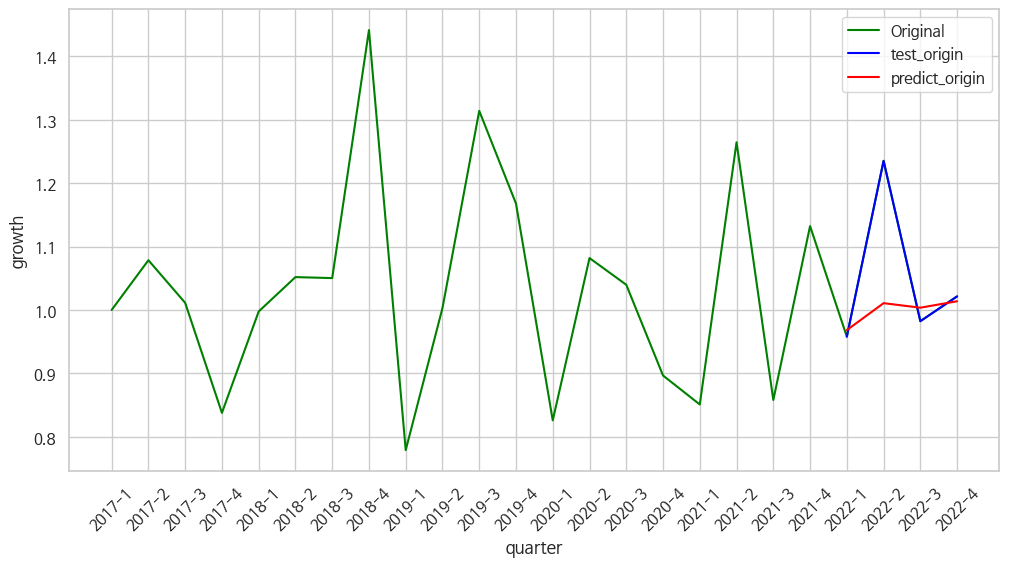

In [41]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_bunsik['분기'], ap_bunsik['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [42]:
## error의 요약 통계량
error.describe()

count    4.000000
mean     0.050148
std      0.116858
min     -0.021271
25%     -0.013052
50%     -0.001330
75%      0.061870
max      0.224520
dtype: float64

In [43]:
### 23년 1분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 23ms/step
[[0.28676572]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9688998460769653 


## 23년 1분기 시장성 예측

In [44]:
# 시장성을 예측하기 위한 지표로는 성장성, 안정성, 총매출, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_bunsik[['성장성', '분기당_매출_금액', '순점포증감률']]
y = ap_bunsik.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성   분기당_매출_금액    순점포증감률
0   1.000000  3705934241 -3.603604
1   1.078462  3996708062 -0.909091
2   1.011228  4041582907  4.347826
3   0.837657  3385458535  2.542373
4   0.997589  3377296114  4.065041
5   1.051827  3552330599  8.888889
6   1.050252  3730843072  6.896552
7   1.441443  5377797289  5.844156
8   0.778907  4188805456  1.282051
9   1.003046  4201566574  7.692308
10  1.314055  5521087779  1.142857
11  1.167748  6447238178  2.840909
12  0.825829  5324318859  6.172840
13  1.081854  5760135655  4.046243
14  1.039710  5988868867  3.888889
15  0.896576  5369478015  5.759162
16  0.850879  4568778651  3.030303
17  1.264565  5777519847 -1.538462
18  0.857984  4957017842 -0.515464
19  1.132285  5612756253  5.365854
20  0.957864  5376256926  3.301887
21  1.235220  6640861464  5.454545
22  0.982282  6523201170  2.212389
23  1.021391  6662739416 -1.793722
--------------------------------------------------------------------------------
             시장성
0  -3.283761e+07
1  -2.9740

In [45]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [46]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [47]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.30696477 0.95752834 0.46555905]
 [0.36599358 1.         0.14487754]]


In [48]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [49]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [50]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.0945
Epoch 1: val_loss improved from inf to 0.87844, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.0945 - val_loss: 0.8784
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.0940
Epoch 2: val_loss improved from 0.87844 to 0.87614, saving model to stock_model.h5
1/1 [==============================] - 0s 100ms/step - loss: 0.0940 - val_loss: 0.8761
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.0935
Epoch 3: val_loss improved from 0.87614 to 0.87384, saving model to stock_model.h5
1/1 [==============================] - 0s 85ms/step - loss: 0.0935 - val_loss: 0.8738
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.0930
Epoch 4: val_loss improved from 0.87384 to 0.87154, saving model to stock_model.h5
1/1 [==============================] - 0s 86ms/step - loss: 0.0930 - val_loss: 0.8715
Epoch 5/300
1/1 [================

In [51]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 690ms/step
[[0.19508384]
 [0.2601321 ]
 [0.25846228]
 [0.3012418 ]]


In [52]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_bunsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.743849,0.195084
2022-2,0.366144,0.260132
2022-3,0.226153,0.258462
2022-4,0.251312,0.301242


In [53]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_bunsik.iloc[-len(pred):, 5].values       # 시장성이 ap_bunsik의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.743849,0.195084,-1.591227e+07,-30102544.0,1.419027e+07
2022-2,0.366144,0.260132,-2.567918e+07,-28420492.0,2.741308e+06
2022-3,0.226153,0.258462,-2.929913e+07,-28463668.0,-8.354598e+05
2022-4,0.251312,0.301242,-2.864857e+07,-27357454.0,-1.291114e+06


### 결과

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


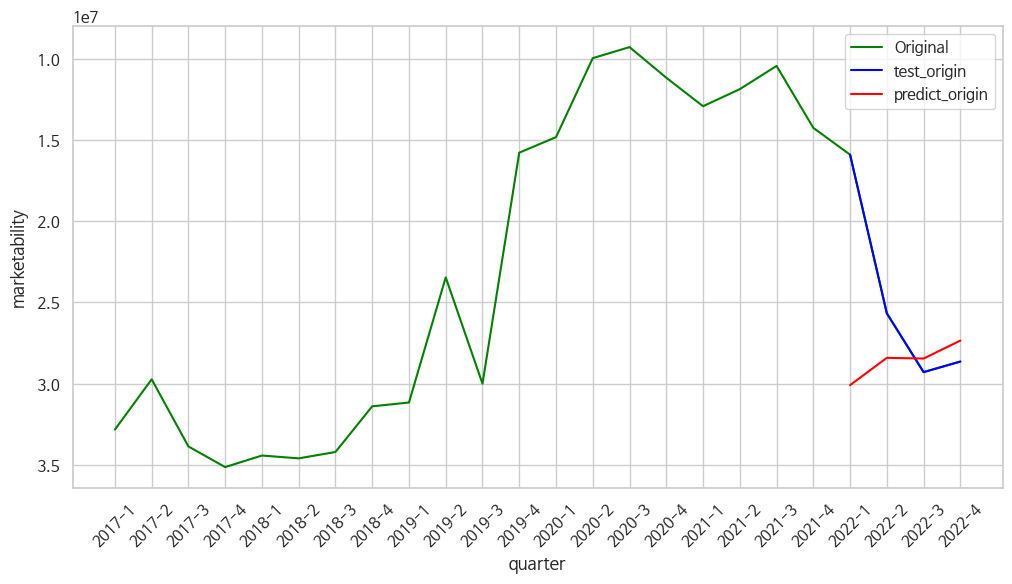

In [54]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_bunsik['분기'], ap_bunsik['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [55]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     3.701252e+06
std      7.221416e+06
min     -1.291114e+06
25%     -9.493734e+05
50%      9.529241e+05
75%      5.603549e+06
max      1.419027e+07
dtype: float64

In [56]:
### 23년 1분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 25ms/step
[[0.23551111]]
--------------------------------------------------------------------------------
예측된 시장성  : -29057152.0 


## 23년 1분기 순점포증감률 예측

In [57]:
# 순점포증감률을 예측하기 위한 지표로는 성장성, 총매출, 시장성 선정

### X / y 데이터 생성
X = ap_bunsik[['성장성', '분기당_매출_금액', '시장성']]
y = ap_bunsik.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성   분기당_매출_금액           시장성
0   1.000000  3705934241 -3.283761e+07
1   1.078462  3996708062 -2.974064e+07
2   1.011228  4041582907 -3.387565e+07
3   0.837657  3385458535 -3.514713e+07
4   0.997589  3377296114 -3.443415e+07
5   1.051827  3552330599 -3.460896e+07
6   1.050252  3730843072 -3.421668e+07
7   1.441443  5377797289 -3.140496e+07
8   0.778907  4188805456 -3.117048e+07
9   1.003046  4201566574 -2.346546e+07
10  1.314055  5521087779 -3.001125e+07
11  1.167748  6447238178 -1.578800e+07
12  0.825829  5324318859 -1.483297e+07
13  1.081854  5760135655 -9.968984e+06
14  1.039710  5988868867 -9.288583e+06
15  0.896576  5369478015 -1.117391e+07
16  0.850879  4568778651 -1.292837e+07
17  1.264565  5777519847 -1.187691e+07
18  0.857984  4957017842 -1.044694e+07
19  1.132285  5612756253 -1.426054e+07
20  0.957864  5376256926 -1.591227e+07
21  1.235220  6640861464 -2.567918e+07
22  0.982282  6523201170 -2.929913e+07
23  1.021391  6662739416 -2.864857e+07
-------------------------

In [58]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [59]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [60]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.30696477 0.95752834 0.22615347]
 [0.36599358 1.         0.25131187]]


In [61]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [62]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [63]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.4835
Epoch 1: val_loss improved from inf to 0.39116, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.4835 - val_loss: 0.3912
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.4824
Epoch 2: val_loss improved from 0.39116 to 0.38979, saving model to stock_model.h5
1/1 [==============================] - 0s 101ms/step - loss: 0.4824 - val_loss: 0.3898
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.4812
Epoch 3: val_loss improved from 0.38979 to 0.38841, saving model to stock_model.h5
1/1 [==============================] - 0s 117ms/step - loss: 0.4812 - val_loss: 0.3884
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.4801
Epoch 4: val_loss improved from 0.38841 to 0.38704, saving model to stock_model.h5
1/1 [==============================] - 0s 126ms/step - loss: 0.4801 - val_loss: 0.3870
Epoch 5/300
1/1 [==============

In [64]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 949ms/step
[[0.5065726 ]
 [0.58216166]
 [0.5343802 ]
 [0.5748248 ]]


In [65]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_bunsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.552771,0.506573
2022-2,0.725087,0.582162
2022-3,0.465559,0.534380
2022-4,0.144878,0.574825


In [66]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_bunsik.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_bunsik의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.552771,0.506573,3.301887,2.724751,0.577136
2022-2,0.725087,0.582162,5.454545,3.669047,1.785499
2022-3,0.465559,0.534380,2.212389,3.072137,-0.859748
2022-4,0.144878,0.574825,-1.793722,3.577391,-5.371113


### 결과

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


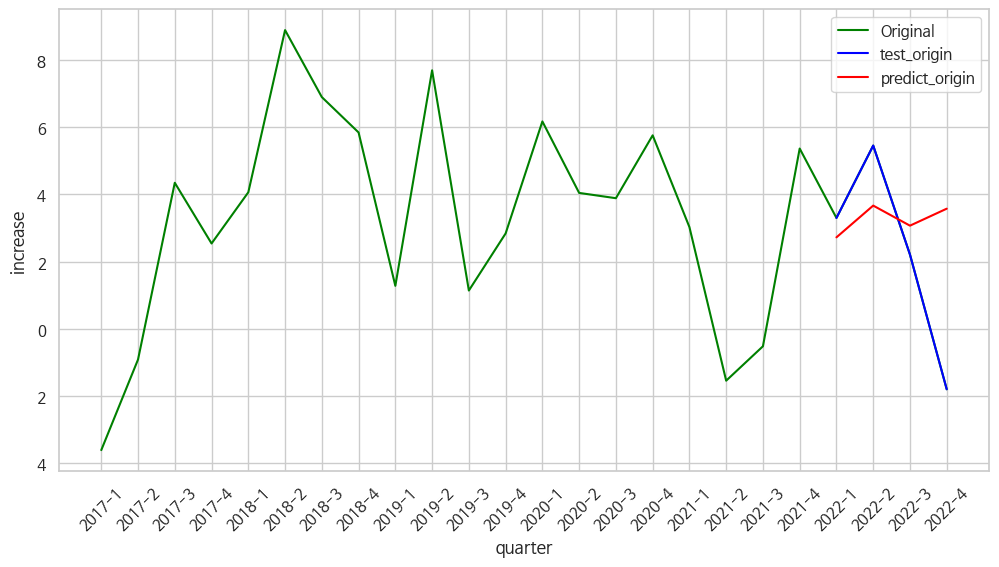

In [67]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_bunsik['분기'], ap_bunsik['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [68]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -0.967057
std      3.128808
min     -5.371113
25%     -1.987589
50%     -0.141306
75%      0.879227
max      1.785499
dtype: float64

In [69]:
### 23년 1분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 31ms/step
[[0.45401704]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : 2.0682008266448975 


## 원본 데이터에 예측값 추가하기

In [70]:
print(sales)
print(growth)
print(marketability)
print(increase)

4246370000.0
0.96889985
-29057152.0
2.0682008


In [71]:
ap_bunsik.loc[24] = ['2023-1', 'etability]ㅈ', sales, growth, increase, marketability]

<ipython-input-71-241a4d97c526>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_bunsik.loc[24] = ['2023-1', 'etability]ㅈ', sales, growth, increase, marketability]


In [72]:
ap_bunsik

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,분식전문점,3.705934e+09,1.000000,-3.603604,-3.283761e+07
1,2017-2,분식전문점,3.996708e+09,1.078462,-0.909091,-2.974064e+07
2,2017-3,분식전문점,4.041583e+09,1.011228,4.347826,-3.387565e+07
3,2017-4,분식전문점,3.385459e+09,0.837657,2.542373,-3.514713e+07
4,2018-1,분식전문점,3.377296e+09,0.997589,4.065041,-3.443415e+07
5,2018-2,분식전문점,3.552331e+09,1.051827,8.888889,-3.460896e+07
6,2018-3,분식전문점,3.730843e+09,1.050252,6.896552,-3.421668e+07
7,2018-4,분식전문점,5.377797e+09,1.441443,5.844156,-3.140496e+07
8,2019-1,분식전문점,4.188805e+09,0.778907,1.282051,-3.117048e+07
9,2019-2,분식전문점,4.201567e+09,1.003046,7.692308,-2.346546e+07


## 23년 2분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [73]:
### X / y 데이터 생성
X = ap_bunsik[['성장성', '시장성', '순점포증감률']]
y = ap_bunsik.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -3.283761e+07 -3.603604
1   1.078462 -2.974064e+07 -0.909091
2   1.011228 -3.387565e+07  4.347826
3   0.837657 -3.514713e+07  2.542373
4   0.997589 -3.443415e+07  4.065041
5   1.051827 -3.460896e+07  8.888889
6   1.050252 -3.421668e+07  6.896552
7   1.441443 -3.140496e+07  5.844156
8   0.778907 -3.117048e+07  1.282051
9   1.003046 -2.346546e+07  7.692308
10  1.314055 -3.001125e+07  1.142857
11  1.167748 -1.578800e+07  2.840909
12  0.825829 -1.483297e+07  6.172840
13  1.081854 -9.968984e+06  4.046243
14  1.039710 -9.288583e+06  3.888889
15  0.896576 -1.117391e+07  5.759162
16  0.850879 -1.292837e+07  3.030303
17  1.264565 -1.187691e+07 -1.538462
18  0.857984 -1.044694e+07 -0.515464
19  1.132285 -1.426054e+07  5.365854
20  0.957864 -1.591227e+07  3.301887
21  1.235220 -2.567918e+07  5.454545
22  0.982282 -2.929913e+07  2.212389
23  1.021391 -2.864857e+07 -1.793722
24  0.968900 -2.905715e+07  2.068201
--------------------------------------

In [74]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [75]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.36599358 0.25131187 0.14487754]
 [0.28676581 0.23551114 0.45401704]]


In [76]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [77]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_9 (LSTM)               (None, 32)                12416     
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [78]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2131
Epoch 1: val_loss improved from inf to 0.46089, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2131 - val_loss: 0.4609
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2122
Epoch 2: val_loss improved from 0.46089 to 0.45922, saving model to stock_model.h5
1/1 [==============================] - 0s 81ms/step - loss: 0.2122 - val_loss: 0.4592
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2114
Epoch 3: val_loss improved from 0.45922 to 0.45755, saving model to stock_model.h5
1/1 [==============================] - 0s 91ms/step - loss: 0.2114 - val_loss: 0.4576
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2106
Epoch 4: val_loss improved from 0.45755 to 0.45589, saving model to stock_model.h5
1/1 [==============================] - 0s 91ms/step - loss: 0.2106 - val_loss: 0.4559
Epoch 5/300
1/1 [=================

In [79]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 677ms/step
[[0.44622323]
 [0.40725318]
 [0.4000523 ]
 [0.28615654]]


In [80]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_bunsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.993341,0.446223
2022-3,0.957528,0.407253
2022-4,1.000000,0.400052
2023-1,0.264523,0.286157


In [81]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_bunsik.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_bunsik의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.993341,0.446223,6.640861e+09,4.843337e+09,1.797524e+09
2022-3,0.957528,0.407253,6.523201e+09,4.715303e+09,1.807898e+09
2022-4,1.000000,0.400052,6.662739e+09,4.691645e+09,1.971094e+09
2023-1,0.264523,0.286157,4.246370e+09,4.317447e+09,-7.107712e+07


In [82]:
df_test = df_test.reset_index()

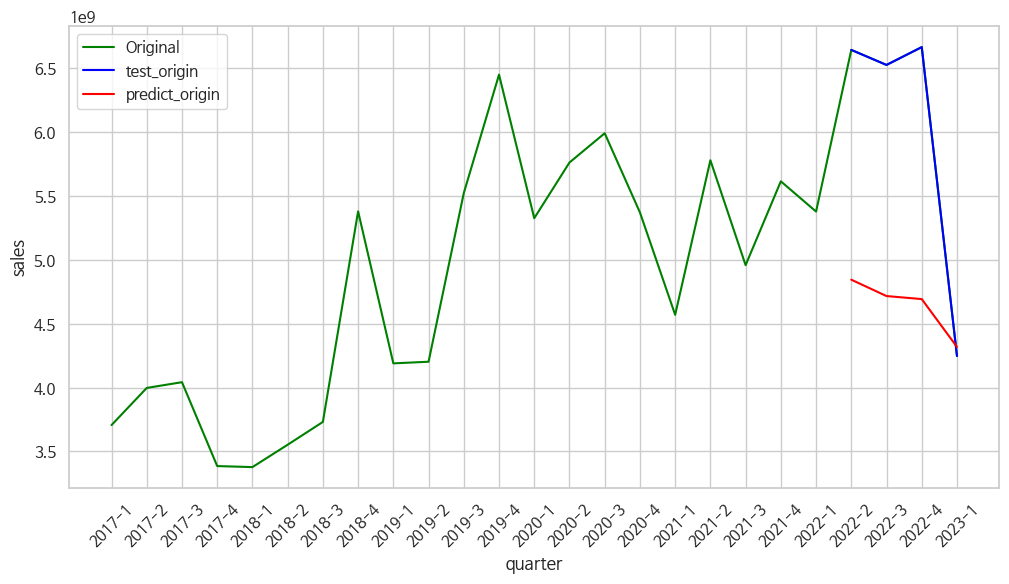

In [83]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_bunsik['분기'], ap_bunsik['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [84]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     1.376360e+09
std      9.682264e+08
min     -7.107712e+07
25%      1.330374e+09
50%      1.802711e+09
75%      1.848697e+09
max      1.971094e+09
dtype: float64

In [85]:
### 23년 2분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 22ms/step
[[0.26099068]]
--------------------------------------------------------------------------------
예측된 매출  : 4234766080.0 


### 성장성

In [86]:
### X / y 데이터 생성
X = ap_bunsik[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_bunsik.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   3.705934e+09 -3.283761e+07 -3.603604
1   3.996708e+09 -2.974064e+07 -0.909091
2   4.041583e+09 -3.387565e+07  4.347826
3   3.385459e+09 -3.514713e+07  2.542373
4   3.377296e+09 -3.443415e+07  4.065041
5   3.552331e+09 -3.460896e+07  8.888889
6   3.730843e+09 -3.421668e+07  6.896552
7   5.377797e+09 -3.140496e+07  5.844156
8   4.188805e+09 -3.117048e+07  1.282051
9   4.201567e+09 -2.346546e+07  7.692308
10  5.521088e+09 -3.001125e+07  1.142857
11  6.447238e+09 -1.578800e+07  2.840909
12  5.324319e+09 -1.483297e+07  6.172840
13  5.760136e+09 -9.968984e+06  4.046243
14  5.988869e+09 -9.288583e+06  3.888889
15  5.369478e+09 -1.117391e+07  5.759162
16  4.568779e+09 -1.292837e+07  3.030303
17  5.777520e+09 -1.187691e+07 -1.538462
18  4.957018e+09 -1.044694e+07 -0.515464
19  5.612756e+09 -1.426054e+07  5.365854
20  5.376257e+09 -1.591227e+07  3.301887
21  6.640861e+09 -2.567918e+07  5.454545
22  6.523201e+09 -2.929913e+07  2.212389
23  6.662739e+09

In [87]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [88]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[1.         0.25131187 0.14487754]
 [0.26452258 0.23551114 0.45401704]]


In [89]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [90]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_11 (LSTM)              (None, 32)                12416     
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [91]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2558
Epoch 1: val_loss improved from inf to 0.19646, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.2558 - val_loss: 0.1965
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2549
Epoch 2: val_loss improved from 0.19646 to 0.19545, saving model to stock_model.h5
1/1 [==============================] - 0s 92ms/step - loss: 0.2549 - val_loss: 0.1954
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2540
Epoch 3: val_loss improved from 0.19545 to 0.19444, saving model to stock_model.h5
1/1 [==============================] - 0s 86ms/step - loss: 0.2540 - val_loss: 0.1944
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2531
Epoch 4: val_loss improved from 0.19444 to 0.19344, saving model to stock_model.h5
1/1 [==============================] - 0s 85ms/step - loss: 0.2531 - val_loss: 0.1934
Epoch 5/300
1/1 [=================

In [92]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 645ms/step
[[0.3721072 ]
 [0.35888585]
 [0.37320867]
 [0.29908034]]


In [93]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_bunsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.688737,0.372107
2022-3,0.306965,0.358886
2022-4,0.365994,0.373209
2023-1,0.286766,0.299080


In [94]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_bunsik.iloc[-len(pred):, 3].values       # 성장성이 ap_bunsik의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.688737,0.372107,1.235220,1.025442,0.209779
2022-3,0.306965,0.358886,0.982282,1.016682,-0.034400
2022-4,0.365994,0.373209,1.021391,1.026171,-0.004780
2023-1,0.286766,0.299080,0.968900,0.977059,-0.008159


In [95]:
df_test = df_test.reset_index()

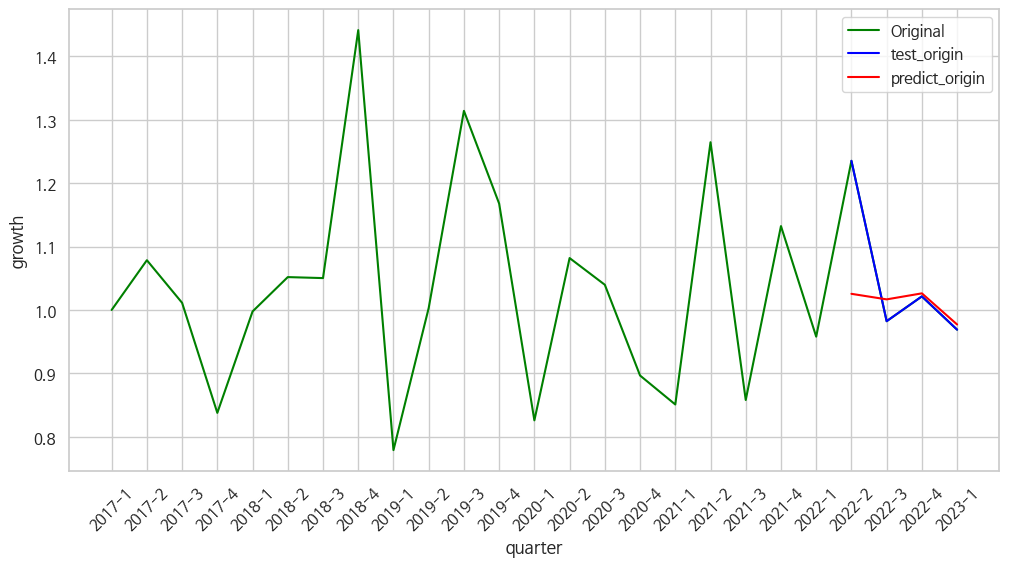

In [96]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_bunsik['분기'], ap_bunsik['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [97]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.040610
std      0.113553
min     -0.034400
25%     -0.014719
50%     -0.006470
75%      0.048859
max      0.209779
dtype: float64

In [98]:
### 23년 2분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 25ms/step
[[0.25897408]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9504867792129517 


### 시장성

In [99]:
### X / y 데이터 생성
X = ap_bunsik[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_bunsik.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   3.705934e+09  1.000000 -3.603604
1   3.996708e+09  1.078462 -0.909091
2   4.041583e+09  1.011228  4.347826
3   3.385459e+09  0.837657  2.542373
4   3.377296e+09  0.997589  4.065041
5   3.552331e+09  1.051827  8.888889
6   3.730843e+09  1.050252  6.896552
7   5.377797e+09  1.441443  5.844156
8   4.188805e+09  0.778907  1.282051
9   4.201567e+09  1.003046  7.692308
10  5.521088e+09  1.314055  1.142857
11  6.447238e+09  1.167748  2.840909
12  5.324319e+09  0.825829  6.172840
13  5.760136e+09  1.081854  4.046243
14  5.988869e+09  1.039710  3.888889
15  5.369478e+09  0.896576  5.759162
16  4.568779e+09  0.850879  3.030303
17  5.777520e+09  1.264565 -1.538462
18  4.957018e+09  0.857984 -0.515464
19  5.612756e+09  1.132285  5.365854
20  5.376257e+09  0.957864  3.301887
21  6.640861e+09  1.235220  5.454545
22  6.523201e+09  0.982282  2.212389
23  6.662739e+09  1.021391 -1.793722
24  4.246370e+09  0.968900  2.068201
--------------------------------------

In [100]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [101]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[1.         0.36599358 0.14487754]
 [0.26452258 0.28676581 0.45401704]]


In [102]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [103]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_13 (LSTM)              (None, 32)                12416     
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [104]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1493
Epoch 1: val_loss improved from inf to 0.84897, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.1493 - val_loss: 0.8490
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1487
Epoch 2: val_loss improved from 0.84897 to 0.84676, saving model to stock_model.h5
1/1 [==============================] - 0s 84ms/step - loss: 0.1487 - val_loss: 0.8468
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1480
Epoch 3: val_loss improved from 0.84676 to 0.84454, saving model to stock_model.h5
1/1 [==============================] - 0s 84ms/step - loss: 0.1480 - val_loss: 0.8445
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1474
Epoch 4: val_loss improved from 0.84454 to 0.84234, saving model to stock_model.h5
1/1 [==============================] - 0s 88ms/step - loss: 0.1474 - val_loss: 0.8423
Epoch 5/300
1/1 [=================

In [105]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 969ms/step
[[0.3737314 ]
 [0.38102093]
 [0.46418312]
 [0.3912482 ]]


In [106]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_bunsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.366144,0.373731
2022-3,0.226153,0.381021
2022-4,0.251312,0.464183
2023-1,0.235511,0.391248


In [107]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_bunsik.iloc[-len(pred):, 5].values       # 시장성이 ap_bunsik의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.366144,0.373731,-2.567918e+07,-25482976.0,-1.962081e+05
2022-3,0.226153,0.381021,-2.929913e+07,-25294480.0,-4.004648e+06
2022-4,0.251312,0.464183,-2.864857e+07,-23144028.0,-5.504540e+06
2023-1,0.235511,0.391248,-2.905715e+07,-25030018.0,-4.027134e+06


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


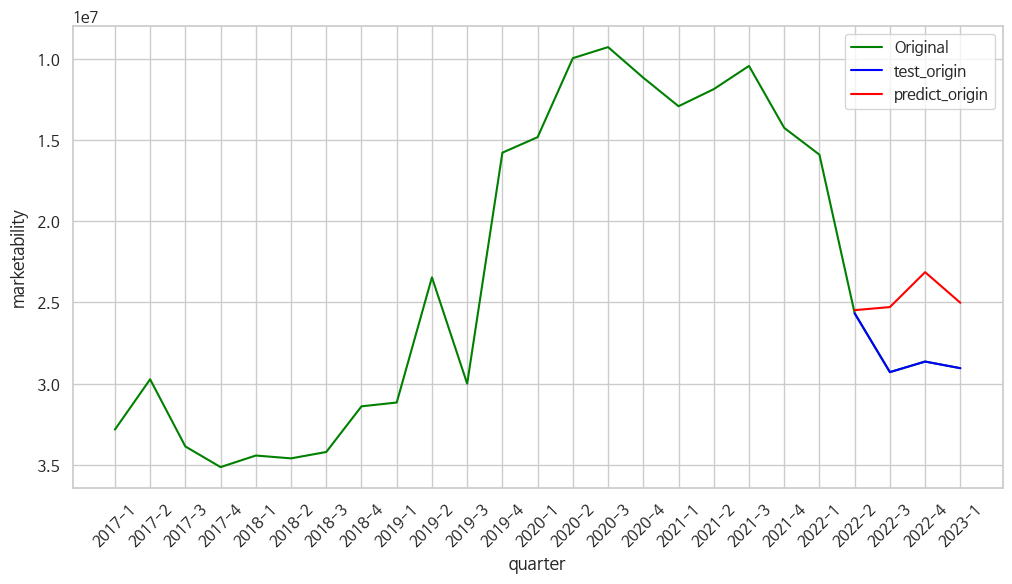

In [108]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_bunsik['분기'], ap_bunsik['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [109]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -3.433132e+06
std      2.269205e+06
min     -5.504540e+06
25%     -4.396486e+06
50%     -4.015891e+06
75%     -3.052538e+06
max     -1.962081e+05
dtype: float64

In [110]:
### 23년 2분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 22ms/step
[[0.32574892]]
--------------------------------------------------------------------------------
예측된 시장성  : -26723734.0 


### 순점포증감률

In [111]:
### X / y 데이터 생성
X = ap_bunsik[['분기당_매출_금액', '성장성', '시장성']]
y = ap_bunsik.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   3.705934e+09  1.000000 -3.283761e+07
1   3.996708e+09  1.078462 -2.974064e+07
2   4.041583e+09  1.011228 -3.387565e+07
3   3.385459e+09  0.837657 -3.514713e+07
4   3.377296e+09  0.997589 -3.443415e+07
5   3.552331e+09  1.051827 -3.460896e+07
6   3.730843e+09  1.050252 -3.421668e+07
7   5.377797e+09  1.441443 -3.140496e+07
8   4.188805e+09  0.778907 -3.117048e+07
9   4.201567e+09  1.003046 -2.346546e+07
10  5.521088e+09  1.314055 -3.001125e+07
11  6.447238e+09  1.167748 -1.578800e+07
12  5.324319e+09  0.825829 -1.483297e+07
13  5.760136e+09  1.081854 -9.968984e+06
14  5.988869e+09  1.039710 -9.288583e+06
15  5.369478e+09  0.896576 -1.117391e+07
16  4.568779e+09  0.850879 -1.292837e+07
17  5.777520e+09  1.264565 -1.187691e+07
18  4.957018e+09  0.857984 -1.044694e+07
19  5.612756e+09  1.132285 -1.426054e+07
20  5.376257e+09  0.957864 -1.591227e+07
21  6.640861e+09  1.235220 -2.567918e+07
22  6.523201e+09  0.982282 -2.929913e+07
23  6.662739e+09

In [112]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [113]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[1.         0.36599358 0.25131187]
 [0.26452258 0.28676581 0.23551114]]


In [114]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [115]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_15 (LSTM)              (None, 32)                12416     
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [116]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.5089
Epoch 1: val_loss improved from inf to 0.33851, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.5089 - val_loss: 0.3385
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.5077
Epoch 2: val_loss improved from 0.33851 to 0.33713, saving model to stock_model.h5
1/1 [==============================] - 0s 85ms/step - loss: 0.5077 - val_loss: 0.3371
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.5064
Epoch 3: val_loss improved from 0.33713 to 0.33576, saving model to stock_model.h5
1/1 [==============================] - 0s 83ms/step - loss: 0.5064 - val_loss: 0.3358
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.5052
Epoch 4: val_loss improved from 0.33576 to 0.33440, saving model to stock_model.h5
1/1 [==============================] - 0s 79ms/step - loss: 0.5052 - val_loss: 0.3344
Epoch 5/300
1/1 [=================

In [117]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 673ms/step
[[0.5528125 ]
 [0.51877445]
 [0.55507594]
 [0.46638185]]


In [118]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_bunsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.725087,0.552813
2022-3,0.465559,0.518774
2022-4,0.144878,0.555076
2023-1,0.454017,0.466382


In [119]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_bunsik.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_bunsik의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.725087,0.552813,5.454545,3.302403,2.152143
2022-3,0.465559,0.518774,2.212389,2.877182,-0.664793
2022-4,0.144878,0.555076,-1.793722,3.330678,-5.124400
2023-1,0.454017,0.466382,2.068201,2.222668,-0.154467


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


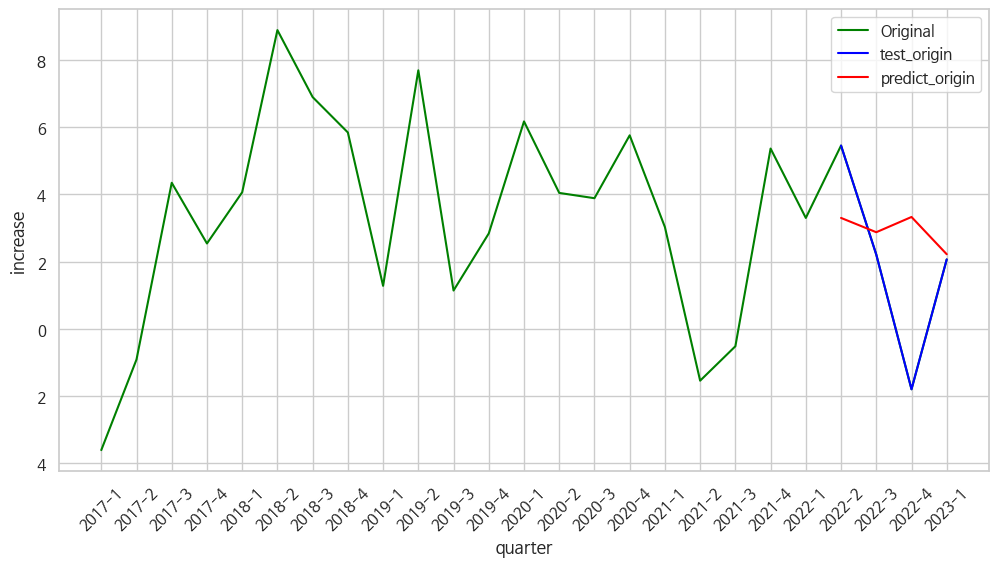

In [120]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_bunsik['분기'], ap_bunsik['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [121]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -0.947879
std      3.042099
min     -5.124400
25%     -1.779695
50%     -0.409630
75%      0.422185
max      2.152143
dtype: float64

In [122]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 27ms/step
[[0.4422145]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : 1.9207576513290405 


### 추가


In [123]:
ap_bunsik.loc[25] = ['2023-2', '분식전문점수리리', sales, growth, increase, marketability]

<ipython-input-123-0579597fab97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_bunsik.loc[25] = ['2023-2', '분식전문점수리리', sales, growth, increase, marketability]


In [124]:
ap_bunsik

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,분식전문점,3.705934e+09,1.000000,-3.603604,-3.283761e+07
1,2017-2,분식전문점,3.996708e+09,1.078462,-0.909091,-2.974064e+07
2,2017-3,분식전문점,4.041583e+09,1.011228,4.347826,-3.387565e+07
3,2017-4,분식전문점,3.385459e+09,0.837657,2.542373,-3.514713e+07
4,2018-1,분식전문점,3.377296e+09,0.997589,4.065041,-3.443415e+07
5,2018-2,분식전문점,3.552331e+09,1.051827,8.888889,-3.460896e+07
6,2018-3,분식전문점,3.730843e+09,1.050252,6.896552,-3.421668e+07
7,2018-4,분식전문점,5.377797e+09,1.441443,5.844156,-3.140496e+07
8,2019-1,분식전문점,4.188805e+09,0.778907,1.282051,-3.117048e+07
9,2019-2,분식전문점,4.201567e+09,1.003046,7.692308,-2.346546e+07


## 23년 3분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [125]:
################ 매출 ####################

### X / y 데이터 생성
X = ap_bunsik[['성장성', '시장성', '순점포증감률']]
y = ap_bunsik.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -3.283761e+07 -3.603604
1   1.078462 -2.974064e+07 -0.909091
2   1.011228 -3.387565e+07  4.347826
3   0.837657 -3.514713e+07  2.542373
4   0.997589 -3.443415e+07  4.065041
5   1.051827 -3.460896e+07  8.888889
6   1.050252 -3.421668e+07  6.896552
7   1.441443 -3.140496e+07  5.844156
8   0.778907 -3.117048e+07  1.282051
9   1.003046 -2.346546e+07  7.692308
10  1.314055 -3.001125e+07  1.142857
11  1.167748 -1.578800e+07  2.840909
12  0.825829 -1.483297e+07  6.172840
13  1.081854 -9.968984e+06  4.046243
14  1.039710 -9.288583e+06  3.888889
15  0.896576 -1.117391e+07  5.759162
16  0.850879 -1.292837e+07  3.030303
17  1.264565 -1.187691e+07 -1.538462
18  0.857984 -1.044694e+07 -0.515464
19  1.132285 -1.426054e+07  5.365854
20  0.957864 -1.591227e+07  3.301887
21  1.235220 -2.567918e+07  5.454545
22  0.982282 -2.929913e+07  2.212389
23  1.021391 -2.864857e+07 -1.793722
24  0.968900 -2.905715e+07  2.068201
25  0.950487 -2.672373e+07  1.920758
-

In [126]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [127]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.28676581 0.23551114 0.45401704]
 [0.258974   0.32574893 0.44221449]]


In [128]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [129]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_17 (LSTM)              (None, 32)                12416     
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [130]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2439
Epoch 1: val_loss improved from inf to 0.52136, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2439 - val_loss: 0.5214
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2430
Epoch 2: val_loss improved from 0.52136 to 0.51954, saving model to stock_model.h5
1/1 [==============================] - 0s 119ms/step - loss: 0.2430 - val_loss: 0.5195
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2421
Epoch 3: val_loss improved from 0.51954 to 0.51772, saving model to stock_model.h5
1/1 [==============================] - 0s 115ms/step - loss: 0.2421 - val_loss: 0.5177
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2412
Epoch 4: val_loss improved from 0.51772 to 0.51591, saving model to stock_model.h5
1/1 [==============================] - 0s 116ms/step - loss: 0.2412 - val_loss: 0.5159
Epoch 5/300
1/1 [==============

In [131]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 665ms/step
[[0.44445533]
 [0.43181142]
 [0.30851352]
 [0.28181124]]


In [132]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_bunsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.957528,0.444455
2022-4,1.000000,0.431811
2023-1,0.264523,0.308514
2023-2,0.260991,0.281811


In [133]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_bunsik.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_bunsik의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.957528,0.444455,6.523201e+09,4.837529e+09,1.685672e+09
2022-4,1.000000,0.431811,6.662739e+09,4.795988e+09,1.866751e+09
2023-1,0.264523,0.308514,4.246370e+09,4.390900e+09,-1.445297e+08
2023-2,0.260991,0.281811,4.234766e+09,4.303171e+09,-6.840499e+07


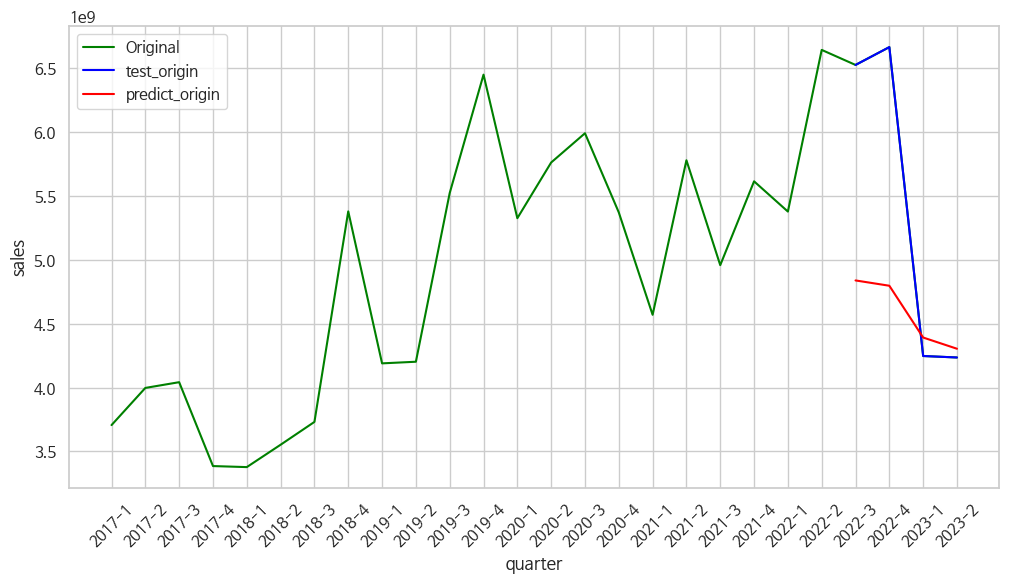

In [134]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_bunsik['분기'], ap_bunsik['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [135]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     8.348722e+08
std      1.089919e+09
min     -1.445297e+08
25%     -8.743616e+07
50%      8.086335e+08
75%      1.730942e+09
max      1.866751e+09
dtype: float64

In [136]:
### 23년 3분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 23ms/step
[[0.33069688]]
--------------------------------------------------------------------------------
예측된 매출  : 4463781888.0 


### 성장성

In [137]:
X = ap_bunsik[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_bunsik.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   3.705934e+09 -3.283761e+07 -3.603604
1   3.996708e+09 -2.974064e+07 -0.909091
2   4.041583e+09 -3.387565e+07  4.347826
3   3.385459e+09 -3.514713e+07  2.542373
4   3.377296e+09 -3.443415e+07  4.065041
5   3.552331e+09 -3.460896e+07  8.888889
6   3.730843e+09 -3.421668e+07  6.896552
7   5.377797e+09 -3.140496e+07  5.844156
8   4.188805e+09 -3.117048e+07  1.282051
9   4.201567e+09 -2.346546e+07  7.692308
10  5.521088e+09 -3.001125e+07  1.142857
11  6.447238e+09 -1.578800e+07  2.840909
12  5.324319e+09 -1.483297e+07  6.172840
13  5.760136e+09 -9.968984e+06  4.046243
14  5.988869e+09 -9.288583e+06  3.888889
15  5.369478e+09 -1.117391e+07  5.759162
16  4.568779e+09 -1.292837e+07  3.030303
17  5.777520e+09 -1.187691e+07 -1.538462
18  4.957018e+09 -1.044694e+07 -0.515464
19  5.612756e+09 -1.426054e+07  5.365854
20  5.376257e+09 -1.591227e+07  3.301887
21  6.640861e+09 -2.567918e+07  5.454545
22  6.523201e+09 -2.929913e+07  2.212389
23  6.662739e+09

In [138]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [139]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.26452258 0.23551114 0.45401704]
 [0.26099064 0.32574893 0.44221449]]


In [140]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [141]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_19 (LSTM)              (None, 32)                12416     
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [142]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2552
Epoch 1: val_loss improved from inf to 0.23200, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.2552 - val_loss: 0.2320
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2542
Epoch 2: val_loss improved from 0.23200 to 0.23087, saving model to stock_model.h5
1/1 [==============================] - 0s 83ms/step - loss: 0.2542 - val_loss: 0.2309
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2533
Epoch 3: val_loss improved from 0.23087 to 0.22974, saving model to stock_model.h5
1/1 [==============================] - 0s 91ms/step - loss: 0.2533 - val_loss: 0.2297
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2524
Epoch 4: val_loss improved from 0.22974 to 0.22862, saving model to stock_model.h5
1/1 [==============================] - 0s 84ms/step - loss: 0.2524 - val_loss: 0.2286
Epoch 5/300
1/1 [=================

In [143]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 942ms/step
[[0.38950938]
 [0.4044843 ]
 [0.32407498]
 [0.27970192]]


In [144]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_bunsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.306965,0.389509
2022-4,0.365994,0.404484
2023-1,0.286766,0.324075
2023-2,0.258974,0.279702


In [145]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_bunsik.iloc[-len(pred):, 3].values       # 성장성이 ap_bunsik의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.306965,0.389509,0.982282,1.036971,-0.054689
2022-4,0.365994,0.404484,1.021391,1.046893,-0.025501
2023-1,0.286766,0.324075,0.968900,0.993618,-0.024719
2023-2,0.258974,0.279702,0.950487,0.964220,-0.013733


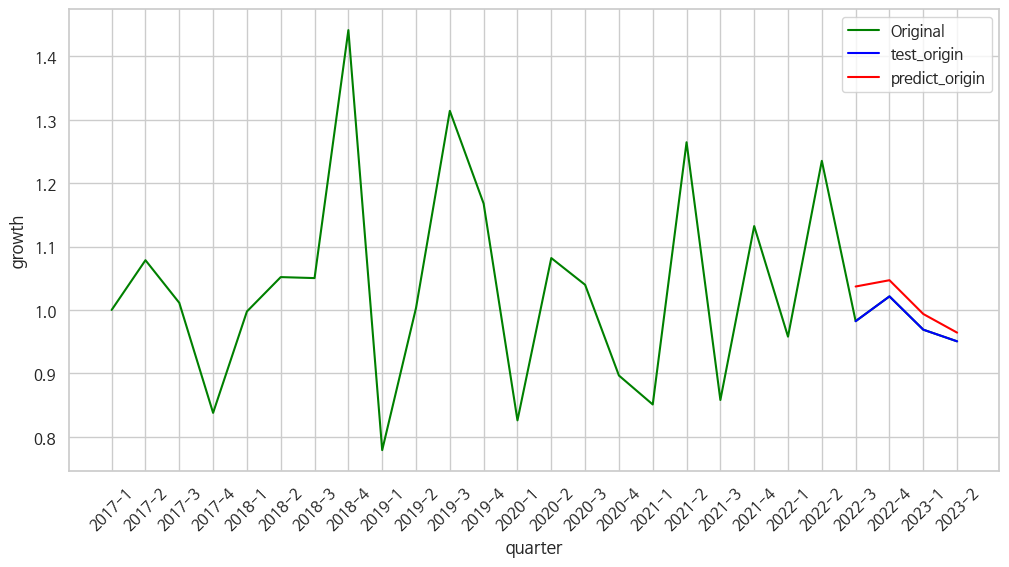

In [146]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_bunsik['분기'], ap_bunsik['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [147]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -0.029660
std      0.017529
min     -0.054689
25%     -0.032798
50%     -0.025110
75%     -0.021972
max     -0.013733
dtype: float64

In [148]:
### 23년 3분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 22ms/step
[[0.29002574]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9710596799850464 


### 시장성

In [149]:
### X / y 데이터 생성
X = ap_bunsik[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_bunsik.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   3.705934e+09  1.000000 -3.603604
1   3.996708e+09  1.078462 -0.909091
2   4.041583e+09  1.011228  4.347826
3   3.385459e+09  0.837657  2.542373
4   3.377296e+09  0.997589  4.065041
5   3.552331e+09  1.051827  8.888889
6   3.730843e+09  1.050252  6.896552
7   5.377797e+09  1.441443  5.844156
8   4.188805e+09  0.778907  1.282051
9   4.201567e+09  1.003046  7.692308
10  5.521088e+09  1.314055  1.142857
11  6.447238e+09  1.167748  2.840909
12  5.324319e+09  0.825829  6.172840
13  5.760136e+09  1.081854  4.046243
14  5.988869e+09  1.039710  3.888889
15  5.369478e+09  0.896576  5.759162
16  4.568779e+09  0.850879  3.030303
17  5.777520e+09  1.264565 -1.538462
18  4.957018e+09  0.857984 -0.515464
19  5.612756e+09  1.132285  5.365854
20  5.376257e+09  0.957864  3.301887
21  6.640861e+09  1.235220  5.454545
22  6.523201e+09  0.982282  2.212389
23  6.662739e+09  1.021391 -1.793722
24  4.246370e+09  0.968900  2.068201
25  4.234766e+09  0.950487  1.920758
-

In [150]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [151]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.26452258 0.28676581 0.45401704]
 [0.26099064 0.258974   0.44221449]]


In [152]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [153]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_21 (LSTM)              (None, 32)                12416     
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [154]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2202
Epoch 1: val_loss improved from inf to 0.74358, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2202 - val_loss: 0.7436
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2194
Epoch 2: val_loss improved from 0.74358 to 0.74155, saving model to stock_model.h5
1/1 [==============================] - 0s 94ms/step - loss: 0.2194 - val_loss: 0.7415
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2186
Epoch 3: val_loss improved from 0.74155 to 0.73952, saving model to stock_model.h5
1/1 [==============================] - 0s 89ms/step - loss: 0.2186 - val_loss: 0.7395
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2177
Epoch 4: val_loss improved from 0.73952 to 0.73750, saving model to stock_model.h5
1/1 [==============================] - 0s 98ms/step - loss: 0.2177 - val_loss: 0.7375
Epoch 5/300
1/1 [=================

In [155]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 643ms/step
[[0.46429756]
 [0.5648145 ]
 [0.47879225]
 [0.3979584 ]]


In [156]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_bunsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.226153,0.464298
2022-4,0.251312,0.564815
2023-1,0.235511,0.478792
2023-2,0.325749,0.397958


In [157]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_bunsik.iloc[-len(pred):, 5].values       # 시장성이 ap_bunsik의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.226153,0.464298,-2.929913e+07,-23141068.0,-6.158060e+06
2022-4,0.251312,0.564815,-2.864857e+07,-20541846.0,-8.106722e+06
2023-1,0.235511,0.478792,-2.905715e+07,-22766258.0,-6.290894e+06
2023-2,0.325749,0.397958,-2.672373e+07,-24856502.0,-1.867232e+06


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


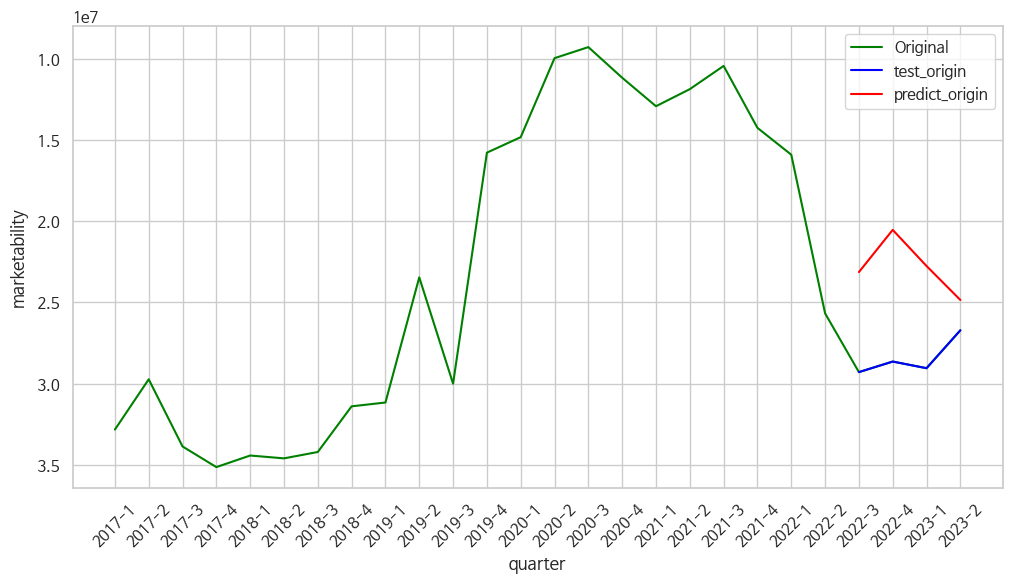

In [158]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_bunsik['분기'], ap_bunsik['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [159]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -5.605727e+06
std      2.646120e+06
min     -8.106722e+06
25%     -6.744851e+06
50%     -6.224477e+06
75%     -5.085353e+06
max     -1.867232e+06
dtype: float64

In [160]:
### 23년 3분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 24ms/step
[[0.28759867]]
--------------------------------------------------------------------------------
예측된 시장성  : -27710244.0 


### 순점포증감률

In [161]:
### X / y 데이터 생성
X = ap_bunsik[['분기당_매출_금액', '성장성', '시장성']]
y = ap_bunsik.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   3.705934e+09  1.000000 -3.283761e+07
1   3.996708e+09  1.078462 -2.974064e+07
2   4.041583e+09  1.011228 -3.387565e+07
3   3.385459e+09  0.837657 -3.514713e+07
4   3.377296e+09  0.997589 -3.443415e+07
5   3.552331e+09  1.051827 -3.460896e+07
6   3.730843e+09  1.050252 -3.421668e+07
7   5.377797e+09  1.441443 -3.140496e+07
8   4.188805e+09  0.778907 -3.117048e+07
9   4.201567e+09  1.003046 -2.346546e+07
10  5.521088e+09  1.314055 -3.001125e+07
11  6.447238e+09  1.167748 -1.578800e+07
12  5.324319e+09  0.825829 -1.483297e+07
13  5.760136e+09  1.081854 -9.968984e+06
14  5.988869e+09  1.039710 -9.288583e+06
15  5.369478e+09  0.896576 -1.117391e+07
16  4.568779e+09  0.850879 -1.292837e+07
17  5.777520e+09  1.264565 -1.187691e+07
18  4.957018e+09  0.857984 -1.044694e+07
19  5.612756e+09  1.132285 -1.426054e+07
20  5.376257e+09  0.957864 -1.591227e+07
21  6.640861e+09  1.235220 -2.567918e+07
22  6.523201e+09  0.982282 -2.929913e+07
23  6.662739e+09

In [162]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [163]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.26452258 0.28676581 0.23551114]
 [0.26099064 0.258974   0.32574893]]


In [164]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [165]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_23 (LSTM)              (None, 32)                12416     
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [166]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.5006
Epoch 1: val_loss improved from inf to 0.35829, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.5006 - val_loss: 0.3583
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.4994
Epoch 2: val_loss improved from 0.35829 to 0.35681, saving model to stock_model.h5
1/1 [==============================] - 0s 166ms/step - loss: 0.4994 - val_loss: 0.3568
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.4981
Epoch 3: val_loss improved from 0.35681 to 0.35533, saving model to stock_model.h5
1/1 [==============================] - 0s 146ms/step - loss: 0.4981 - val_loss: 0.3553
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.4968
Epoch 4: val_loss improved from 0.35533 to 0.35386, saving model to stock_model.h5
1/1 [==============================] - 0s 167ms/step - loss: 0.4968 - val_loss: 0.3539
Epoch 5/300
1/1 [==============

In [167]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 678ms/step
[[0.52901727]
 [0.5559867 ]
 [0.47801402]
 [0.44557983]]


In [168]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_bunsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.465559,0.529017
2022-4,0.144878,0.555987
2023-1,0.454017,0.478014
2023-2,0.442214,0.445580


In [169]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_bunsik.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_bunsik의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.465559,0.529017,2.212389,3.005141,-0.792751
2022-4,0.144878,0.555987,-1.793722,3.342056,-5.135778
2023-1,0.454017,0.478014,2.068201,2.367983,-0.299782
2023-2,0.442214,0.445580,1.920758,1.962799,-0.042041


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


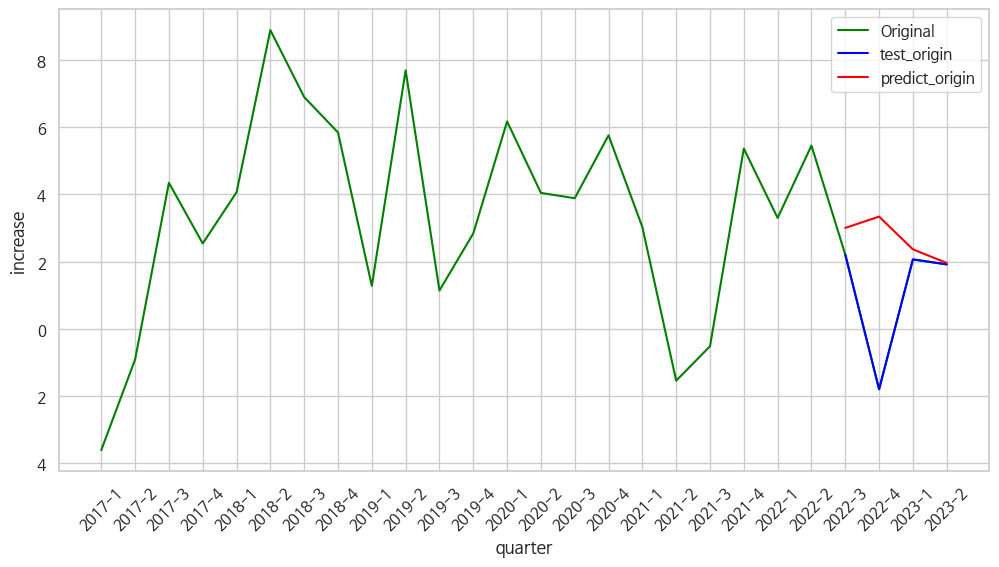

In [170]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_bunsik['분기'], ap_bunsik['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [171]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -1.567588
std      2.399095
min     -5.135778
25%     -1.878508
50%     -0.546267
75%     -0.235347
max     -0.042041
dtype: float64

In [172]:
### 23년 3분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 24ms/step
[[0.3463648]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : 0.7233560085296631 


### 추가

In [173]:
ap_bunsik.loc[26] = ['2023-3', '분식전문점', sales, growth, increase, marketability]

<ipython-input-173-42ed75666c2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_bunsik.loc[26] = ['2023-3', '분식전문점', sales, growth, increase, marketability]


In [174]:
ap_bunsik

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,분식전문점,3.705934e+09,1.000000,-3.603604,-3.283761e+07
1,2017-2,분식전문점,3.996708e+09,1.078462,-0.909091,-2.974064e+07
2,2017-3,분식전문점,4.041583e+09,1.011228,4.347826,-3.387565e+07
3,2017-4,분식전문점,3.385459e+09,0.837657,2.542373,-3.514713e+07
4,2018-1,분식전문점,3.377296e+09,0.997589,4.065041,-3.443415e+07
5,2018-2,분식전문점,3.552331e+09,1.051827,8.888889,-3.460896e+07
6,2018-3,분식전문점,3.730843e+09,1.050252,6.896552,-3.421668e+07
7,2018-4,분식전문점,5.377797e+09,1.441443,5.844156,-3.140496e+07
8,2019-1,분식전문점,4.188805e+09,0.778907,1.282051,-3.117048e+07
9,2019-2,분식전문점,4.201567e+09,1.003046,7.692308,-2.346546e+07


## 23년 4분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본데이터에 추가

### 매출

In [175]:
### X / y 데이터 생성
X = ap_bunsik[['성장성', '시장성', '순점포증감률']]
y = ap_bunsik.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -3.283761e+07 -3.603604
1   1.078462 -2.974064e+07 -0.909091
2   1.011228 -3.387565e+07  4.347826
3   0.837657 -3.514713e+07  2.542373
4   0.997589 -3.443415e+07  4.065041
5   1.051827 -3.460896e+07  8.888889
6   1.050252 -3.421668e+07  6.896552
7   1.441443 -3.140496e+07  5.844156
8   0.778907 -3.117048e+07  1.282051
9   1.003046 -2.346546e+07  7.692308
10  1.314055 -3.001125e+07  1.142857
11  1.167748 -1.578800e+07  2.840909
12  0.825829 -1.483297e+07  6.172840
13  1.081854 -9.968984e+06  4.046243
14  1.039710 -9.288583e+06  3.888889
15  0.896576 -1.117391e+07  5.759162
16  0.850879 -1.292837e+07  3.030303
17  1.264565 -1.187691e+07 -1.538462
18  0.857984 -1.044694e+07 -0.515464
19  1.132285 -1.426054e+07  5.365854
20  0.957864 -1.591227e+07  3.301887
21  1.235220 -2.567918e+07  5.454545
22  0.982282 -2.929913e+07  2.212389
23  1.021391 -2.864857e+07 -1.793722
24  0.968900 -2.905715e+07  2.068201
25  0.950487 -2.672373e+07  1.920758
2

In [176]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [177]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.258974   0.32574893 0.44221449]
 [0.29002576 0.28759868 0.3463648 ]]


In [178]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [179]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_25 (LSTM)              (None, 32)                12416     
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [180]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2439
Epoch 1: val_loss improved from inf to 0.57212, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.2439 - val_loss: 0.5721
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2430
Epoch 2: val_loss improved from 0.57212 to 0.57022, saving model to stock_model.h5
1/1 [==============================] - 0s 87ms/step - loss: 0.2430 - val_loss: 0.5702
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2421
Epoch 3: val_loss improved from 0.57022 to 0.56832, saving model to stock_model.h5
1/1 [==============================] - 0s 85ms/step - loss: 0.2421 - val_loss: 0.5683
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2412
Epoch 4: val_loss improved from 0.56832 to 0.56643, saving model to stock_model.h5
1/1 [==============================] - 0s 88ms/step - loss: 0.2412 - val_loss: 0.5664
Epoch 5/300
1/1 [=================

In [181]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 663ms/step
[[0.43181142]
 [0.30851352]
 [0.28181124]
 [0.33069694]]


In [182]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_bunsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,1.000000,0.431811
2023-1,0.264523,0.308514
2023-2,0.260991,0.281811
2023-3,0.330697,0.330697


In [183]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_bunsik.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_bunsik의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,1.000000,0.431811,6.662739e+09,4.795988e+09,1.866751e+09
2023-1,0.264523,0.308514,4.246370e+09,4.390900e+09,-1.445297e+08
2023-2,0.260991,0.281811,4.234766e+09,4.303171e+09,-6.840499e+07
2023-3,0.330697,0.330697,4.463782e+09,4.463782e+09,-5.120000e+02


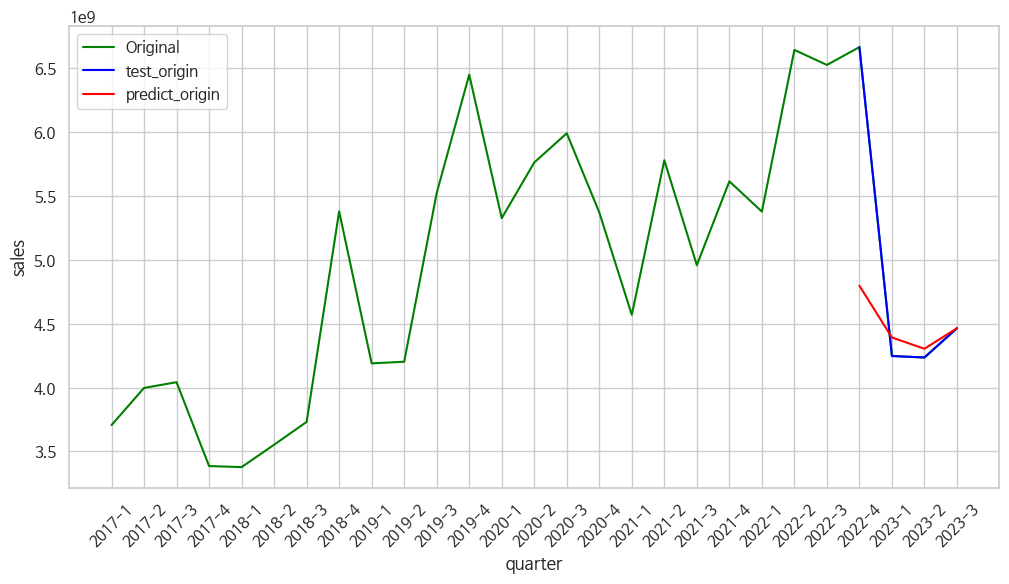

In [184]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_bunsik['분기'], ap_bunsik['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [185]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     4.134541e+08
std      9.706616e+08
min     -1.445297e+08
25%     -8.743616e+07
50%     -3.420275e+07
75%      4.666875e+08
max      1.866751e+09
dtype: float64

In [186]:
### 23년 4분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 23ms/step
[[0.32504225]]
--------------------------------------------------------------------------------
예측된 매출  : 4445203968.0 


### 성장성

In [187]:
X = ap_bunsik[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_bunsik.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   3.705934e+09 -3.283761e+07 -3.603604
1   3.996708e+09 -2.974064e+07 -0.909091
2   4.041583e+09 -3.387565e+07  4.347826
3   3.385459e+09 -3.514713e+07  2.542373
4   3.377296e+09 -3.443415e+07  4.065041
5   3.552331e+09 -3.460896e+07  8.888889
6   3.730843e+09 -3.421668e+07  6.896552
7   5.377797e+09 -3.140496e+07  5.844156
8   4.188805e+09 -3.117048e+07  1.282051
9   4.201567e+09 -2.346546e+07  7.692308
10  5.521088e+09 -3.001125e+07  1.142857
11  6.447238e+09 -1.578800e+07  2.840909
12  5.324319e+09 -1.483297e+07  6.172840
13  5.760136e+09 -9.968984e+06  4.046243
14  5.988869e+09 -9.288583e+06  3.888889
15  5.369478e+09 -1.117391e+07  5.759162
16  4.568779e+09 -1.292837e+07  3.030303
17  5.777520e+09 -1.187691e+07 -1.538462
18  4.957018e+09 -1.044694e+07 -0.515464
19  5.612756e+09 -1.426054e+07  5.365854
20  5.376257e+09 -1.591227e+07  3.301887
21  6.640861e+09 -2.567918e+07  5.454545
22  6.523201e+09 -2.929913e+07  2.212389
23  6.662739e+09

In [188]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [189]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.26099064 0.32574893 0.44221449]
 [0.33069686 0.28759868 0.3463648 ]]


In [190]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [191]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_27 (LSTM)              (None, 32)                12416     
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [192]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2552
Epoch 1: val_loss improved from inf to 0.21909, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.2552 - val_loss: 0.2191
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2542
Epoch 2: val_loss improved from 0.21909 to 0.21798, saving model to stock_model.h5
1/1 [==============================] - 0s 119ms/step - loss: 0.2542 - val_loss: 0.2180
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2533
Epoch 3: val_loss improved from 0.21798 to 0.21688, saving model to stock_model.h5
1/1 [==============================] - 0s 103ms/step - loss: 0.2533 - val_loss: 0.2169
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2524
Epoch 4: val_loss improved from 0.21688 to 0.21578, saving model to stock_model.h5
1/1 [==============================] - 0s 122ms/step - loss: 0.2524 - val_loss: 0.2158
Epoch 5/300
1/1 [==============

In [193]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 658ms/step
[[0.39418447]
 [0.3163261 ]
 [0.27317455]
 [0.2826805 ]]


In [194]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_bunsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.365994,0.394184
2023-1,0.286766,0.316326
2023-2,0.258974,0.273175
2023-3,0.290026,0.282681


In [195]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_bunsik.iloc[-len(pred):, 3].values       # 성장성이 ap_bunsik의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.365994,0.394184,1.021391,1.040069,-0.018677
2023-1,0.286766,0.316326,0.968900,0.988485,-0.019585
2023-2,0.258974,0.273175,0.950487,0.959895,-0.009408
2023-3,0.290026,0.282681,0.971060,0.966193,0.004867


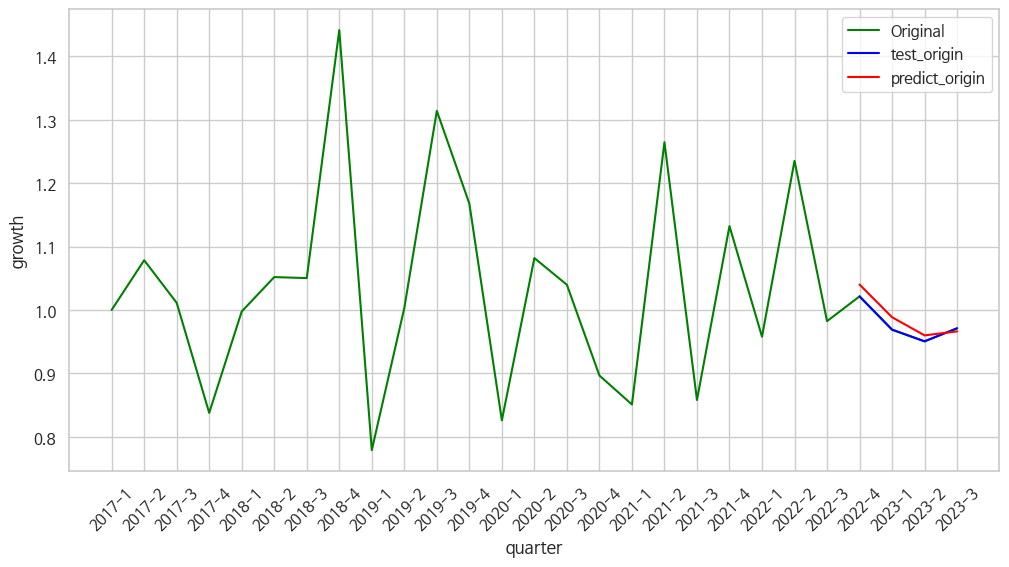

In [196]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_bunsik['분기'], ap_bunsik['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [197]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -0.010701
std      0.011351
min     -0.019585
25%     -0.018904
50%     -0.014043
75%     -0.005840
max      0.004867
dtype: float64

In [198]:
### 23년 4분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 26ms/step
[[0.27634618]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9619964361190796 


###시장성

In [199]:
### X / y 데이터 생성
X = ap_bunsik[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_bunsik.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   3.705934e+09  1.000000 -3.603604
1   3.996708e+09  1.078462 -0.909091
2   4.041583e+09  1.011228  4.347826
3   3.385459e+09  0.837657  2.542373
4   3.377296e+09  0.997589  4.065041
5   3.552331e+09  1.051827  8.888889
6   3.730843e+09  1.050252  6.896552
7   5.377797e+09  1.441443  5.844156
8   4.188805e+09  0.778907  1.282051
9   4.201567e+09  1.003046  7.692308
10  5.521088e+09  1.314055  1.142857
11  6.447238e+09  1.167748  2.840909
12  5.324319e+09  0.825829  6.172840
13  5.760136e+09  1.081854  4.046243
14  5.988869e+09  1.039710  3.888889
15  5.369478e+09  0.896576  5.759162
16  4.568779e+09  0.850879  3.030303
17  5.777520e+09  1.264565 -1.538462
18  4.957018e+09  0.857984 -0.515464
19  5.612756e+09  1.132285  5.365854
20  5.376257e+09  0.957864  3.301887
21  6.640861e+09  1.235220  5.454545
22  6.523201e+09  0.982282  2.212389
23  6.662739e+09  1.021391 -1.793722
24  4.246370e+09  0.968900  2.068201
25  4.234766e+09  0.950487  1.920758
2

In [200]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [201]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.26099064 0.258974   0.44221449]
 [0.33069686 0.29002576 0.3463648 ]]


In [202]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [203]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_29 (LSTM)              (None, 32)                12416     
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [204]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2202
Epoch 1: val_loss improved from inf to 0.66810, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2202 - val_loss: 0.6681
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2194
Epoch 2: val_loss improved from 0.66810 to 0.66622, saving model to stock_model.h5
1/1 [==============================] - 0s 84ms/step - loss: 0.2194 - val_loss: 0.6662
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2186
Epoch 3: val_loss improved from 0.66622 to 0.66435, saving model to stock_model.h5
1/1 [==============================] - 0s 89ms/step - loss: 0.2186 - val_loss: 0.6643
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2177
Epoch 4: val_loss improved from 0.66435 to 0.66248, saving model to stock_model.h5
1/1 [==============================] - 0s 92ms/step - loss: 0.2177 - val_loss: 0.6625
Epoch 5/300
1/1 [=================

In [205]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 641ms/step
[[0.5648145 ]
 [0.47879225]
 [0.3979584 ]
 [0.28759864]]


In [206]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_bunsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.251312,0.564815
2023-1,0.235511,0.478792
2023-2,0.325749,0.397958
2023-3,0.287599,0.287599


In [207]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_bunsik.iloc[-len(pred):, 5].values       # 시장성이 ap_bunsik의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.251312,0.564815,-2.864857e+07,-20541846.0,-8.106722e+06
2023-1,0.235511,0.478792,-2.905715e+07,-22766258.0,-6.290894e+06
2023-2,0.325749,0.397958,-2.672373e+07,-24856502.0,-1.867232e+06
2023-3,0.287599,0.287599,-2.771024e+07,-27710246.0,2.000000e+00


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


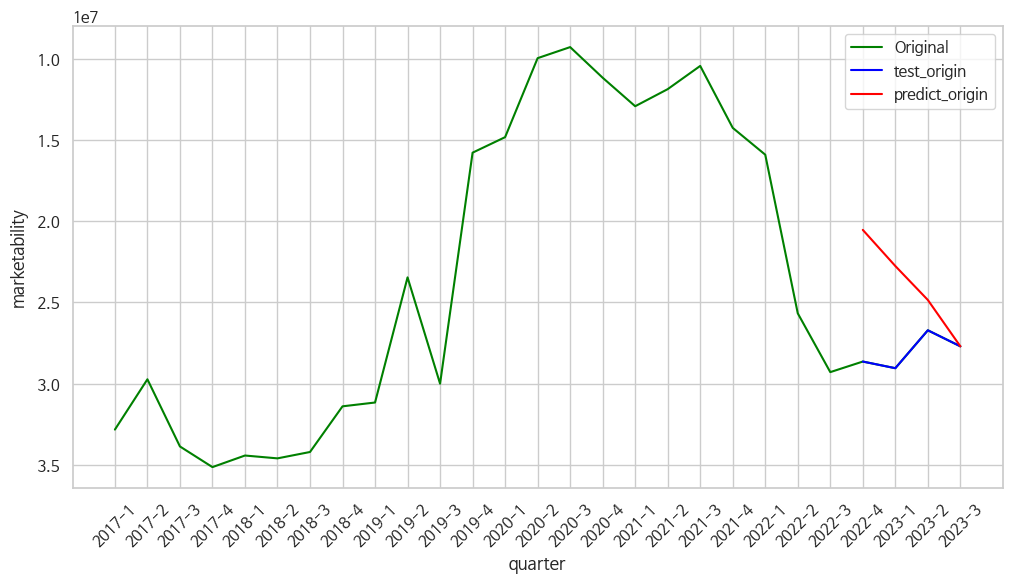

In [208]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_bunsik['분기'], ap_bunsik['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [209]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -4.066212e+06
std      3.770258e+06
min     -8.106722e+06
25%     -6.744851e+06
50%     -4.079063e+06
75%     -1.400424e+06
max      2.000000e+00
dtype: float64

In [210]:
### 23년 4분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 26ms/step
[[0.28555414]]
--------------------------------------------------------------------------------
예측된 시장성  : -27763112.0 


### 순점포증감률

In [211]:
### X / y 데이터 생성
X = ap_bunsik[['분기당_매출_금액', '성장성', '시장성']]
y = ap_bunsik.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   3.705934e+09  1.000000 -3.283761e+07
1   3.996708e+09  1.078462 -2.974064e+07
2   4.041583e+09  1.011228 -3.387565e+07
3   3.385459e+09  0.837657 -3.514713e+07
4   3.377296e+09  0.997589 -3.443415e+07
5   3.552331e+09  1.051827 -3.460896e+07
6   3.730843e+09  1.050252 -3.421668e+07
7   5.377797e+09  1.441443 -3.140496e+07
8   4.188805e+09  0.778907 -3.117048e+07
9   4.201567e+09  1.003046 -2.346546e+07
10  5.521088e+09  1.314055 -3.001125e+07
11  6.447238e+09  1.167748 -1.578800e+07
12  5.324319e+09  0.825829 -1.483297e+07
13  5.760136e+09  1.081854 -9.968984e+06
14  5.988869e+09  1.039710 -9.288583e+06
15  5.369478e+09  0.896576 -1.117391e+07
16  4.568779e+09  0.850879 -1.292837e+07
17  5.777520e+09  1.264565 -1.187691e+07
18  4.957018e+09  0.857984 -1.044694e+07
19  5.612756e+09  1.132285 -1.426054e+07
20  5.376257e+09  0.957864 -1.591227e+07
21  6.640861e+09  1.235220 -2.567918e+07
22  6.523201e+09  0.982282 -2.929913e+07
23  6.662739e+09

In [212]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [213]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.26099064 0.258974   0.32574893]
 [0.33069686 0.29002576 0.28759868]]


In [214]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [215]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_31 (LSTM)              (None, 32)                12416     
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [216]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.5006
Epoch 1: val_loss improved from inf to 0.34554, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.5006 - val_loss: 0.3455
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.4994
Epoch 2: val_loss improved from 0.34554 to 0.34409, saving model to stock_model.h5
1/1 [==============================] - 0s 107ms/step - loss: 0.4994 - val_loss: 0.3441
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.4981
Epoch 3: val_loss improved from 0.34409 to 0.34264, saving model to stock_model.h5
1/1 [==============================] - 0s 110ms/step - loss: 0.4981 - val_loss: 0.3426
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.4968
Epoch 4: val_loss improved from 0.34264 to 0.34120, saving model to stock_model.h5
1/1 [==============================] - 0s 124ms/step - loss: 0.4968 - val_loss: 0.3412
Epoch 5/300
1/1 [==============

In [217]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 938ms/step
[[0.5466631 ]
 [0.47035587]
 [0.4384119 ]
 [0.34110287]]


In [218]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_bunsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.144878,0.546663
2023-1,0.454017,0.470356
2023-2,0.442214,0.438412
2023-3,0.346365,0.341103


In [219]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_bunsik.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_bunsik의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.144878,0.546663,-1.793722,3.225581,-5.019303
2023-1,0.454017,0.470356,2.068201,2.272314,-0.204113
2023-2,0.442214,0.438412,1.920758,1.873254,0.047504
2023-3,0.346365,0.341103,0.723356,0.657621,0.065735


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


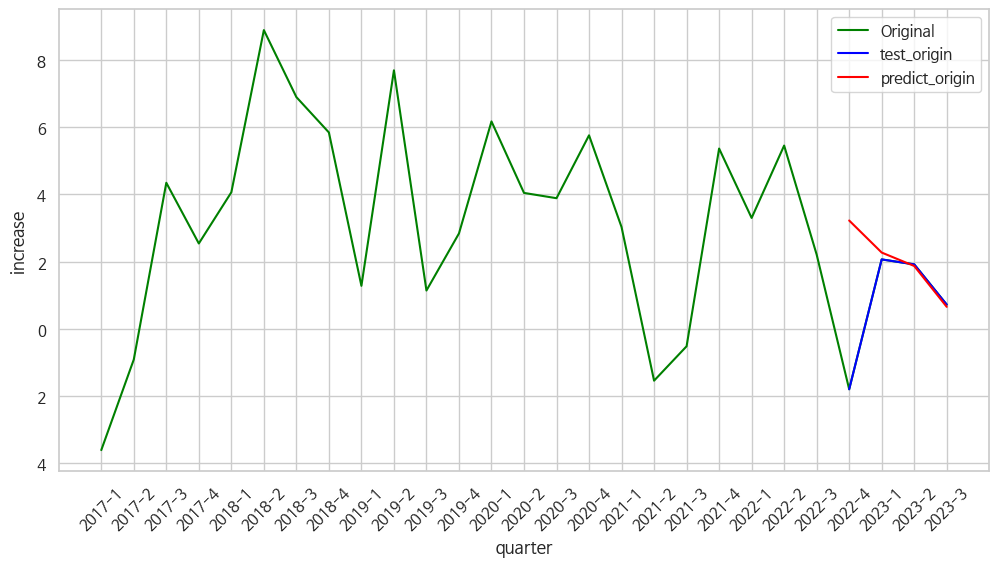

In [220]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_bunsik['분기'], ap_bunsik['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [221]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -1.277544
std      2.497543
min     -5.019303
25%     -1.407910
50%     -0.078304
75%      0.052062
max      0.065735
dtype: float64

In [222]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 32ms/step
[[0.3512359]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : 0.7842082381248474 


### 추가

In [223]:
ap_bunsik.loc[27] = ['2023-4', '분식전문점', sales, growth, increase, marketability]

<ipython-input-223-b10068b31882>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_bunsik.loc[27] = ['2023-4', '분식전문점', sales, growth, increase, marketability]


In [224]:
final_ap_bunsik = ap_bunsik
final_ap_bunsik

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,분식전문점,3.705934e+09,1.000000,-3.603604,-3.283761e+07
1,2017-2,분식전문점,3.996708e+09,1.078462,-0.909091,-2.974064e+07
2,2017-3,분식전문점,4.041583e+09,1.011228,4.347826,-3.387565e+07
3,2017-4,분식전문점,3.385459e+09,0.837657,2.542373,-3.514713e+07
4,2018-1,분식전문점,3.377296e+09,0.997589,4.065041,-3.443415e+07
5,2018-2,분식전문점,3.552331e+09,1.051827,8.888889,-3.460896e+07
6,2018-3,분식전문점,3.730843e+09,1.050252,6.896552,-3.421668e+07
7,2018-4,분식전문점,5.377797e+09,1.441443,5.844156,-3.140496e+07
8,2019-1,분식전문점,4.188805e+09,0.778907,1.282051,-3.117048e+07
9,2019-2,분식전문점,4.201567e+09,1.003046,7.692308,-2.346546e+07


## 최종결과

In [225]:
### X / y 데이터 생성
X = ap_bunsik[['성장성', '시장성', '순점포증감률']]
y = ap_bunsik.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -3.283761e+07 -3.603604
1   1.078462 -2.974064e+07 -0.909091
2   1.011228 -3.387565e+07  4.347826
3   0.837657 -3.514713e+07  2.542373
4   0.997589 -3.443415e+07  4.065041
5   1.051827 -3.460896e+07  8.888889
6   1.050252 -3.421668e+07  6.896552
7   1.441443 -3.140496e+07  5.844156
8   0.778907 -3.117048e+07  1.282051
9   1.003046 -2.346546e+07  7.692308
10  1.314055 -3.001125e+07  1.142857
11  1.167748 -1.578800e+07  2.840909
12  0.825829 -1.483297e+07  6.172840
13  1.081854 -9.968984e+06  4.046243
14  1.039710 -9.288583e+06  3.888889
15  0.896576 -1.117391e+07  5.759162
16  0.850879 -1.292837e+07  3.030303
17  1.264565 -1.187691e+07 -1.538462
18  0.857984 -1.044694e+07 -0.515464
19  1.132285 -1.426054e+07  5.365854
20  0.957864 -1.591227e+07  3.301887
21  1.235220 -2.567918e+07  5.454545
22  0.982282 -2.929913e+07  2.212389
23  1.021391 -2.864857e+07 -1.793722
24  0.968900 -2.905715e+07  2.068201
25  0.950487 -2.672373e+07  1.920758
2

In [226]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (28, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (28, 1)


In [227]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (26, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (26, 1)
[[0.29002576 0.28759868 0.3463648 ]
 [0.27634613 0.28555417 0.3512359 ]]


In [228]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (22, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (22, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [229]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_33 (LSTM)              (None, 32)                12416     
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [230]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2792
Epoch 1: val_loss improved from inf to 0.61017, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2792 - val_loss: 0.6102
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2782
Epoch 2: val_loss improved from 0.61017 to 0.60821, saving model to stock_model.h5
1/1 [==============================] - 0s 86ms/step - loss: 0.2782 - val_loss: 0.6082
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2772
Epoch 3: val_loss improved from 0.60821 to 0.60626, saving model to stock_model.h5
1/1 [==============================] - 0s 83ms/step - loss: 0.2772 - val_loss: 0.6063
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2761
Epoch 4: val_loss improved from 0.60626 to 0.60431, saving model to stock_model.h5
1/1 [==============================] - 0s 82ms/step - loss: 0.2761 - val_loss: 0.6043
Epoch 5/300
1/1 [=================

In [231]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 646ms/step
[[0.32877943]
 [0.29911622]
 [0.35393143]
 [0.34857363]]


In [232]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_bunsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2023-1,0.264523,0.328779
2023-2,0.260991,0.299116
2023-3,0.330697,0.353931
2023-4,0.325042,0.348574


In [233]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_bunsik.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_bunsik의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2023-1,0.264523,0.328779,4.246370e+09,4.457482e+09,-211112192.0
2023-2,0.260991,0.299116,4.234766e+09,4.360026e+09,-125259520.0
2023-3,0.330697,0.353931,4.463782e+09,4.540118e+09,-76336128.0
2023-4,0.325042,0.348574,4.445204e+09,4.522515e+09,-77310976.0


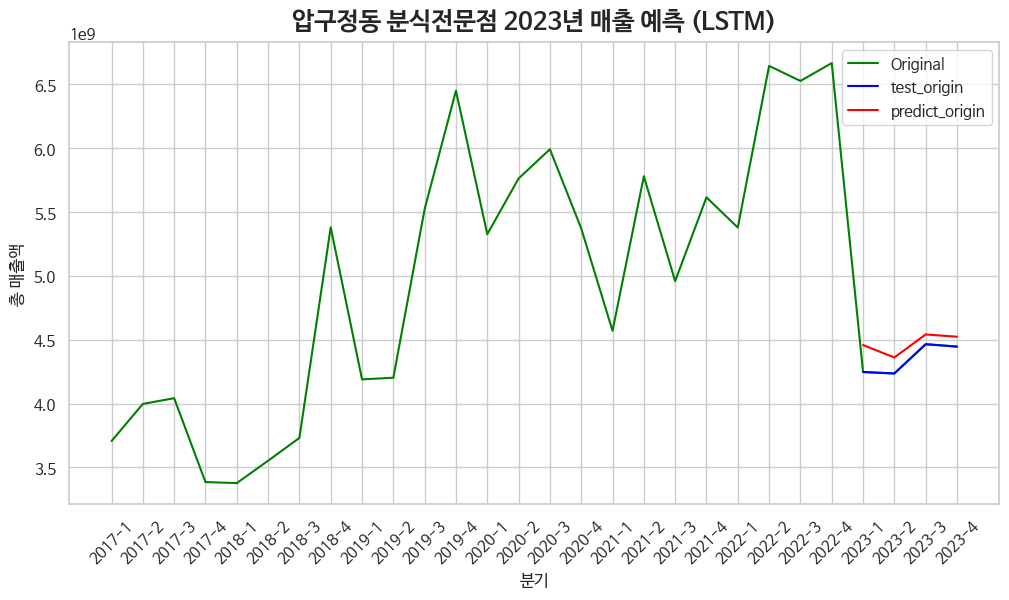

In [234]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.title('압구정동 분식전문점 2023년 매출 예측 (LSTM)', fontsize = 18, fontweight='bold', pad =10)


plt.plot(ap_bunsik['분기'], ap_bunsik['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('분기')
plt.ylabel('총 매출액')
plt.legend()
plt.show()